# Data Science Exam Answered By ABABA LATA GUTA( Data Scientist)


###  First,Import Necessary Library that used to calculate a monthly cohort analysis of users, grouping them by their signup month (created_at) connect to your PostgreSQL database using psycopg2 and import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Setup Environment and Connection

In [2]:
connection=psycopg2.connect(user="postgres",
                            password="******",
                            host="localhost",
                            port="5432",
                            database="exam")
connection

<connection object at 0x7c3eaa582c00; dsn: 'user=postgres password=xxx dbname=exam host=localhost port=5432', closed: 0>

In [3]:
query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'public';"
tables = pd.read_sql(query, connection)
table_names = tables['table_name'].tolist()
tables

,table_name
0,banners
1,bulk_deals
2,carts
3,geography_columns
4,geometry_columns
5,spatial_ref_sys
6,casbin_rule
7,category_localizations
8,delivery_location
9,configs


# Data Understanding and Processing

In [4]:

# Optionally, convert table names into a list (if needed elsewhere)
table_names = tables['table_name'].tolist()
print("Table Names:", table_names)

Table Names: ['banners', 'bulk_deals', 'carts', 'geography_columns', 'geometry_columns', 'spatial_ref_sys', 'casbin_rule', 'category_localizations', 'delivery_location', 'configs', 'countries', 'attributes', 'attribute_values', 'categories', 'driver_rating', 'groups_carts', 'devices', 'drivers', 'delivery_tracks', 'group_cart_variations', 'orders', 'product_variation_prices', 'groups', 'personal_cart_items', 'product_variations', 'group_deals', 'payment_methods', 'product_ratings', 'product_stocks', 'product_variation_attributes', 'product_names', 'product_name_localizations', 'rewards', 'routes', 'product_variation_stocks', 'single_deals', 'topup_requests', 'refund_accounts', 'schema_migrations', 'sms_notifications', 'vehicles', 'products', 'vendor_followers', 'warehouse_vendor', 'wish_lists', 'warehouse', 'users', 'notification_template', 'notifications', 'refund', 'vendors', 'vendor_payments', 'vendor_users']


In [5]:
# Loop through table names and display each table
for table in table_names:
    df = pd.read_sql(f"SELECT * FROM {table}",connection)
    print(f"\nDisplaying {table} data:")
    display(df.head())


Displaying banners data:


,id,name,product_id,image,status,registered_by,created_at,updated_at,deleted_at
0,0fee8c39-07e9-468f-83c5-d67f92be1105,Almi kolo,ca1c291e-6c41-4e97-9002-656cd0e6c178,banner/cbaf8369-61a3-4f4b-981c-d4806465e699,INACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-03-26 12:48:53.242148,2024-07-15 11:39:42.832626,None
1,6bfb166d-0c1b-42bd-ae8a-7f05e40ca86d,Jam comedy Night Event,2b12858f-7067-4d32-a6c4-788091f9e899,banner/beabbb64-90cc-4bb6-9f86-42b095fa3a36,INACTIVE,3a431b3f-d4d1-4707-a581-92f9d11bd70d,2024-03-21 13:39:51.101331,2024-03-24 09:21:00.375050,None
2,ca31228b-4a46-46fa-aea2-8a310e47c8bf,Teff flakes,e51ab503-f460-46fa-9aa1-06edc6b899d6,banner/55c752be-4979-416b-98f2-7a2b8d5d026a,INACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-01-16 08:27:05.502903,2024-09-01 05:28:28.891113,None
3,65fa3391-706e-4248-98d4-35a3dd99fefb,Apple,d12768be-0765-4414-b1fc-34bb1db63a19,banner/2a50172d-a014-49e3-8ef6-8205cdcbc5ad,INACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-03-20 07:42:00.386986,2024-07-28 12:32:25.992235,None
4,3e2f8156-f64e-4c1b-942e-43db017a3751,Chilly Green,41a15efb-eb44-422f-8e90-b5674ed28bc4,banner/34b4fa35-5297-45d3-bfeb-064436afaa52,INACTIVE,3a431b3f-d4d1-4707-a581-92f9d11bd70d,2024-03-21 05:59:43.365273,2024-09-13 01:51:48.939730,None



Displaying bulk_deals data:


,id,product_id,bulk_price,quantity,status,available_quantity,created_at,updated_at,deleted_at,effective_from,effective_to



Displaying carts data:


,id,user_id,status,created_at,updated_at,deleted_at
0,33203a53-9a81-4093-9098-96b4a77e1088,93a11f49-9afb-4a11-9dd2-17bb60c35e9c,COMPLETED,2023-10-21 12:33:44.353756,2024-05-09 06:44:31.868772,None
1,3f917b0d-d4c8-43dd-8eac-2cc6364c5f3c,47f66dcc-9b56-480a-9af0-611548228b0c,IN_PROGRESS,2023-10-12 18:22:14.512610,2023-10-12 18:22:14.512610,None
2,477defd0-25c0-480f-9331-fd420e5b0eb8,3a431b3f-d4d1-4707-a581-92f9d11bd70d,IN_PROGRESS,2023-10-12 18:41:19.958432,2023-10-12 18:41:19.958432,None
3,6d179854-4606-4d8d-af95-0a287df5ebd7,fa5ddbce-1556-4efe-981b-ef78fcd4036d,IN_PROGRESS,2023-10-13 05:17:53.639124,2023-10-13 05:17:53.639124,None
4,29fb9269-095e-4b8b-87b1-f55cd531c8a3,57758649-508f-4e6a-873e-7f0af1157eaa,COMPLETED,2023-10-12 13:34:32.210807,2024-04-25 16:07:15.037120,None



Displaying geography_columns data:


,f_table_catalog,f_table_schema,f_table_name,f_geography_column,coord_dimension,srid,type



Displaying geometry_columns data:


,f_table_catalog,f_table_schema,f_table_name,f_geometry_column,coord_dimension,srid,type



Displaying spatial_ref_sys data:


,srid,auth_name,auth_srid,srtext,proj4text
0,2000,EPSG,2000,"PROJCS[""Anguilla 1957 / British West Indies Gr...",+proj=tmerc +lat_0=0 +lon_0=-62 +k=0.999500000...
1,2001,EPSG,2001,"PROJCS[""Antigua 1943 / British West Indies Gri...",+proj=tmerc +lat_0=0 +lon_0=-62 +k=0.999500000...
2,2002,EPSG,2002,"PROJCS[""Dominica 1945 / British West Indies Gr...",+proj=tmerc +lat_0=0 +lon_0=-62 +k=0.999500000...
3,2003,EPSG,2003,"PROJCS[""Grenada 1953 / British West Indies Gri...",+proj=tmerc +lat_0=0 +lon_0=-62 +k=0.999500000...
4,2004,EPSG,2004,"PROJCS[""Montserrat 1958 / British West Indies ...",+proj=tmerc +lat_0=0 +lon_0=-62 +k=0.999500000...



Displaying casbin_rule data:


,id,p_type,v0,v1,v2,v3,v4,v5
0,cea2f44ccba0bc9ffe6691f48b2009fd,g3,20f79a3d-86d8-4761-b79e-a3129e48b0a5,sys_admin,None,None,None,None
1,c9f38d439927c8a36b1b507587ef64e1,p,20f79a3d-86d8-4761-b79e-a3129e48b0a5,system,/,GET,None,None



Displaying category_localizations data:


,id,local_name,short_description,long_description,category_id,language_code,created_at,updated_at,deleted_at
0,e56dced0-d109-4a64-aa54-4f998867358c,አትክልት,አትክልት,አትክልት,af95ccc0-6ddb-4b10-82b2-4de8dabfcc46,AMH,2024-06-06 13:23:30.750339,None,None
1,f73253f5-c95a-4773-9c21-dc51e64b3469,ፍራፍሬ,ፍራፍሬ,ፍራፍሬ,33cd8255-6371-4baf-9888-555973935748,AMH,2024-06-06 13:24:27.886168,None,None
2,b47facee-f46e-41bd-9f25-0ad94f1649fb,የሕፃናት እቃዎች,የሕፃናት እቃዎች,የሕፃናት እቃዎች,ed470df7-f8ae-4d26-8865-7241f085785b,AMH,2024-06-06 13:37:17.115938,None,None
3,790aea03-2080-4f33-a4b1-06c74e75933b,የበዓል,የበዓል,የበዓል,a403e12a-aad6-4c1b-b9c2-a9ba0dacb96b,AMH,2024-06-07 06:40:45.367779,None,None
4,6c0732b0-0531-46f6-b5dc-b36e4da6ac22,ንፅህና መጠበቅያ,የግል እንክብካቤ,የግል እንክብካቤ,6fe71c72-7796-466a-acbf-aa1c93f1a123,AMH,2024-06-06 13:31:30.168312,None,None



Displaying delivery_location data:


,id,name,location_title,location,delivery_type,status,created_by,created_at,updated_at,deleted_at,additional_contact_name,additional_contact_phone
0,d1b222bf-2815-4564-982a-a17d2be6cdc0,Unknown,None,"(0,0)",LAST_MILE,ACTIVE,b3ebef09-1dc7-4bb3-a37c-a546af414de0,2024-01-03 16:50:00.032762,2024-01-03 16:50:00.032762,NaT,None,None
1,9c962a0c-8f2c-4d57-8b54-178cc15f8887,Bole 11,None,"(0,0)",LAST_MILE,ACTIVE,6aed2ba8-eeef-4cb9-bcf2-4ed88d23f8cf,2024-01-03 09:01:57.413287,2024-01-03 09:01:57.413287,NaT,None,None
2,7f45123f-1545-453c-a5c7-59149e6da94d,Gerji Condominium,None,"(0,0)",LAST_MILE,ACTIVE,eaeeec4e-ecc5-44be-9c52-278de0efe5c8,2023-10-31 13:45:03.062367,2023-10-31 13:45:03.062367,NaT,None,None
3,394a8185-8d79-4451-9bdd-fbb2c1312731,Djibuti St,None,"(0,0)",LAST_MILE,ACTIVE,8a281177-d9b4-4d66-bb15-72cf049e4a4b,2024-01-09 11:13:50.974735,2024-01-09 11:13:50.974735,NaT,None,None
4,0f9e14c3-f58a-4718-bf2d-1b43a225956c,Bole 11,None,"(0,0)",LAST_MILE,ACTIVE,aa85c138-0528-4025-901b-60a81c1d8619,2023-10-31 15:09:44.270927,2023-10-31 15:09:44.270927,NaT,None,None



Displaying configs data:


,id,config,created_at,updated_at,status
0,13f74feb-fb45-4dfe-b51f-89e6042b90e4,"{'banks': [{'status': 'ACTIVE', 'bank_name': '...",2023-10-12 08:54:36.725029,2024-10-15 20:24:27.279776,ACTIVE



Displaying countries data:


,id,country_name,country_code,flag,iso_country_code,currency,currency_symbol,created_at,updated_at,deleted_at
0,4391b559-957b-4d6f-854b-3817aaa6f6e0,Ethiopia,+251,https://productionchipchip.fra1.digitaloceansp...,ETH,Birr,Br,2023-10-12 08:54:36.801477,None,None



Displaying attributes data:


,id,name,created_by,created_at,updated_at,deleted_at
0,3696fdc3-79f6-470f-aaba-9a125418e87f,Material Type,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:34:47.260403,2024-07-11 13:34:47.260403,None
1,b8038b84-06eb-4e1c-b347-de1b26ae998c,Size,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:35:57.142757,2024-07-11 13:35:57.142757,None
2,17e232e3-3d9b-49a0-b31f-7d2a868c7f2e,Color,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:35:12.279162,2024-07-11 13:35:12.279162,None
3,343e9ff4-9286-4fa9-a85f-ad9a68ffbe7b,Weight,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-26 07:14:36.695078,2024-06-26 07:14:36.695078,None
4,2266c8f9-f058-4d01-bf94-e0ea2aeef23c,Liter,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-26 07:18:52.101674,2024-06-26 07:18:52.101674,None



Displaying attribute_values data:


,id,attribute_id,value,created_by,created_at,updated_at,deleted_at
0,bb0767b0-01fa-4e91-b181-f5d29eade7aa,17e232e3-3d9b-49a0-b31f-7d2a868c7f2e,#808080,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:37:15.406072,2024-07-11 13:37:15.406072,None
1,f40d2871-61de-46f3-b856-8bd1d986b59a,17e232e3-3d9b-49a0-b31f-7d2a868c7f2e,#800020,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:37:57.654269,2024-07-11 13:37:57.654269,None
2,2878b595-5f35-4807-8193-927370a05aeb,17e232e3-3d9b-49a0-b31f-7d2a868c7f2e,#FFFFFF,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:43:26.802316,2024-07-11 13:43:26.802316,None
3,ad2369c0-be18-4d54-8b5c-e0a5474eb62c,b8038b84-06eb-4e1c-b347-de1b26ae998c,Large,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:44:19.422734,2024-07-11 13:44:19.422734,None
4,6eb107d1-8d4e-432f-9f78-5ee98bb641d3,b8038b84-06eb-4e1c-b347-de1b26ae998c,Medium,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-07-11 13:45:54.698988,2024-07-11 13:45:54.698988,None



Displaying categories data:


,id,name,short_description,long_description,status,primary_image,detail_images,created_at,updated_at,deleted_at,created_by
0,af95ccc0-6ddb-4b10-82b2-4de8dabfcc46,Vegetable,desc,desc,ACTIVE,category/318486d9-c483-4b8b-88ce-1ef17978ff3f,[category/a7b3db05-0d38-4db7-9ee0-b10dfb446e6c...,2023-10-12 10:00:38.345655,None,NaT,ad752023-a7af-4b14-95d0-6399f95c6eb6
1,33cd8255-6371-4baf-9888-555973935748,Fruit,desc,desc,ACTIVE,category/89b4922e-0c95-457d-ba78-930a8bc911cc,[category/a1c2a9ef-54ae-4309-96f4-114d2dec3e27...,2023-10-12 10:56:05.999844,None,NaT,ad752023-a7af-4b14-95d0-6399f95c6eb6
2,6f1ecaa5-fac0-4111-ac77-a717940c788d,Baking Goods,"Bakery products, which include bread, rolls, c...",Baking is a method of preparing food that uses...,ACTIVE,category/dab92f07-f88b-4742-86e0-60b1edaced3e,[category/941d3465-7b56-4921-a374-7bb755777bd0...,2023-12-25 12:56:50.072762,None,NaT,e485817f-6d13-4a80-9112-86cd4a2eabff
3,ed470df7-f8ae-4d26-8865-7241f085785b,Baby Items,one-stop destination for premium baby essentia...,Our selection of high-quality baby items offer...,ACTIVE,category/0baddeb0-2c86-411e-8264-0fbb7b906a381,[category/f64e0876-e66b-49a2-8ed7-4032eced963b...,2024-05-15 06:34:20.603587,None,NaT,e485817f-6d13-4a80-9112-86cd4a2eabff
4,4f78f76d-ab7e-4553-9535-93b113150f20,Condiments,Condiments are substances that are normally ad...,A condiment is a preparation that is added to ...,ACTIVE,category/be5cd994-3826-4a2c-9e6b-3385bcbf5b1e,[category/b2446775-7264-4813-a660-23ff503cc650...,2023-12-26 08:01:44.407034,None,NaT,e485817f-6d13-4a80-9112-86cd4a2eabff



Displaying driver_rating data:


,id,rating,comment,user_id,created_at,updated_at,deleted_at,route_id
0,48daafe4-c77b-4042-887f-fcc943a05585,5,,19024354-b265-4dc8-8bb6-8e691fa75bd2,2024-04-18 13:31:03.446733,2024-04-18 13:31:03.446733,None,dff864d4-47a8-461b-bec1-d94a56dda6cf
1,5e91d4c8-f542-42b0-8742-6d3361283a95,3,,e71293f0-298c-440b-9d28-c977b7bd1214,2024-04-19 03:54:11.461551,2024-04-19 03:54:11.461551,None,1ca11c1d-80cd-4457-a5f7-372da6cde91b
2,50cf6c23-0f95-49dd-8ac0-bec0a249af17,5,,67f1923a-eaea-4947-b345-c90c14552362,2024-04-19 04:22:51.507793,2024-04-19 04:22:51.507793,None,dff864d4-47a8-461b-bec1-d94a56dda6cf
3,1aca888e-d20d-4f2d-88e3-44582e3217f9,5,,29cffb42-bed5-47be-b8a4-854a8003655f,2024-04-19 05:01:45.713598,2024-04-19 05:01:45.713598,None,3ba03c20-b84c-4b59-a3c2-234d2016268f
4,aabb3843-7dc4-425d-9500-669e8a4c9a57,3,,afd6cd73-3d66-49e0-8b49-de686f33469e,2024-04-19 05:06:41.765922,2024-04-19 05:06:41.765922,None,01b2fff5-b8eb-4f82-b881-f9247ecc93da



Displaying groups_carts data:


,id,group_id,user_id,quantity,status,created_at,updated_at,deleted_at
0,32c07740-345f-4cfd-aca7-bfd58edb1fb7,e60d7466-d5f2-4ec0-a233-7cb517bc51b4,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,1,COMPLETED,2023-10-12 12:25:24.589544,2023-10-12 12:27:58.139840,NaT
1,7946d4a5-fe41-4d13-8ee7-8d42b90a0415,34435226-f9e5-4957-9f1b-e821321960c4,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,0,IN_PROGRESS,2023-10-12 13:03:05.058391,2023-10-12 13:03:05.058391,2023-10-12 13:10:21.105147
2,96e31f35-6c3f-432a-907b-57ea9e3f6a97,1acf96ae-3355-4aca-af0d-0bc8e73fb123,57758649-508f-4e6a-873e-7f0af1157eaa,1,IN_PROGRESS,2023-10-12 13:26:18.874248,2023-10-12 13:26:18.874248,NaT
3,9e9cefc2-6d3c-4809-95a7-8df1fa1c7d13,44d26f57-ba93-4061-8991-e0f973ffeab5,ca93c110-e885-40df-9cb0-9f8c6fdd2c47,0,IN_PROGRESS,2023-10-13 05:18:34.134569,2023-10-13 05:18:34.134569,2023-10-13 05:19:06.940813
4,39b20ff8-b764-451a-aaea-7f5a14964936,44d26f57-ba93-4061-8991-e0f973ffeab5,521c42f3-bf68-4cfe-8f06-188c0415d61f,1,IN_PROGRESS,2023-10-12 18:13:23.338895,2023-10-12 18:13:23.338895,NaT



Displaying devices data:


,id,user_id,os,os_version,created_at,updated_at,deleted_at,firebase_token,device_id,app_version,platform
0,b536c5ba-1965-4fe3-a40b-7d29fa912f65,acb6dc5e-194c-4297-8908-194ed0f97c12,Android,10,2024-06-17 11:51:24.642310,None,None,dsVQc7LESw-p6hS5KWS7_M:APA91bHcWPRuJ-uu0_OhLLU...,351c7153-6009-4db9-a6da-934ed2e89c15,154,USER
1,a6cd41c3-d71d-4f5a-8b16-a2e963f566aa,343dad1c-cd77-4a82-a92b-f4a2e1b5cf15,Android,12,2024-06-17 11:51:59.249081,None,None,fWlCjOk0T-SkQdYHRE3Wpg:APA91bEi1hIwYrhqPYHzWfj...,684c8474-f6f8-4f1b-ab3a-8b18c3e7670e,142,USER
2,af2df044-e1bd-4976-8057-684dc9c452e6,3b88db79-2558-4007-88a9-b20d781b1c65,Android,12,2024-06-17 11:52:08.515573,None,None,cp_3KWMBSB-fDIensq0eTC:APA91bFUspkxlZCRusGUYBX...,7841e10a-7b35-4674-95ef-cf15cd6f9a44,154,USER
3,d12d6e3b-f0df-4793-9456-20feaaa161eb,fe6081cc-ccfb-4a63-9f41-1782fd87c5c0,Android,13,2024-06-17 11:52:30.653560,None,None,f6ibY7nAQ46ggOH5ixnpH1:APA91bGjXZzjjf8joCq2b42...,971736af-0b7a-428f-8f7a-0df1c46a24b6,154,USER
4,0b290405-e286-4363-8a1c-4d2961ad83f3,e8f50255-f7f4-418f-b9ae-d3b22bfb69bf,Android,11,2024-06-17 11:52:41.574155,None,None,dBm_uE3uT3aF1d5VDELal8:APA91bE55CUxI05mrVd3cgC...,b0663595-5ada-4392-87c0-6e4d93f4f409,154,USER



Displaying drivers data:


,id,user_id,status,insurance_certificate,vehicle_ownership_certificate,commission_account,identification,created_at,updated_at,deleted_at
0,f66c8a20-2d95-418e-a559-598f7f0a5eb7,6764e5d6-d0ca-45c2-8c3c-a09f7e6a8296,ACTIVE,a,a,None,a,2024-03-04 14:42:59.684744,2024-03-04 14:42:59.684744,None
1,7e81a482-f9aa-4021-89d8-17e31d5e8d5d,1b05b63e-b0d3-4bce-8d4d-0875cf358976,ACTIVE,j,j,None,j,2024-06-24 16:59:45.376160,2024-06-24 16:59:45.376160,None
2,a723c49b-fa5d-4399-8048-176ae9635ea9,5fb674f7-97e2-4c2c-ab18-47225e2f949f,ACTIVE,d,d,None,d,2024-06-24 16:58:28.244514,2024-06-24 16:58:28.244514,None
3,44ec2521-0098-43e9-9bec-8cc31ba414b6,98689b24-6cd5-47ed-9186-56edafa77448,ACTIVE,legal,legal,None,legal,2024-05-07 16:00:08.835943,2024-05-07 16:00:08.835943,None
4,48ab34d7-5bb5-4473-86e6-0d9b1a1692aa,9159314f-f0bb-4f07-9329-50b502c5e3e8,ACTIVE,hh,hh,None,hh,2024-06-24 16:57:15.866413,2024-06-24 16:57:15.866413,None



Displaying delivery_tracks data:


,id,created_at,updated_at,deleted_at,status,waiting,assigned,in_transit,delivered,group_cart_id,personal_cart_id,route_id,driver_id,return_reason,accepted_from_leader,group_reward
0,a0254319-87ea-442c-bf69-6c303a58e0fa,2023-10-20 13:22:38.965330,2023-10-20 13:22:38.965330,NaT,DELIVERED,2023-10-20 13:22:38.965330,2023-10-20 13:28:07.598731,2023-10-20 13:28:13.545558,2023-10-20 13:28:20.201842,fb32e3b2-d12a-4493-916e-1e09fdb5877c,None,None,None,None,None,NaN
1,e4680df7-03fd-40b0-a5f1-b555ff478385,2023-10-15 17:24:34.384654,2023-10-15 17:24:34.384654,NaT,DELIVERED,2023-10-15 17:24:34.384654,2023-10-18 09:46:34.112428,2023-10-18 09:46:42.791953,2023-10-18 09:46:52.209338,80606d6a-32df-44f3-ad5e-4127c87e1bfd,None,None,None,None,None,NaN
2,0df0543f-e5e9-49da-a612-f09994f6195d,2024-01-12 17:04:23.941973,2024-01-12 17:04:23.941973,NaT,DELIVERED,2024-01-12 17:04:23.941973,2024-01-13 11:37:56.164528,2024-01-13 11:38:00.204875,2024-01-13 11:38:05.601855,e8231cc4-1e19-4556-b28a-d8628624487e,None,None,None,None,None,NaN
3,a5048fe9-b220-483e-945e-53c505540b10,2024-01-12 17:04:23.941973,2024-01-12 17:04:23.941973,NaT,DELIVERED,2024-01-12 17:04:23.941973,2024-01-13 11:37:56.351368,2024-01-13 11:38:00.208261,2024-01-13 11:38:05.804925,ac57d612-c04a-43e9-a153-a5ca9e03006e,None,None,None,None,None,NaN
4,11e706cf-59e0-491d-9b94-6d92e28288e2,2023-10-24 13:28:36.303304,2023-10-24 13:28:36.303304,NaT,REJECTED_BY_VENDOR,NaT,NaT,NaT,NaT,27e672eb-8093-49d7-81fd-8b3370e54ce9,None,None,None,None,None,NaN



Displaying group_cart_variations data:


,id,group_cart_id,product_variation_id,quantity,created_at,updated_at,deleted_at
0,80690a05-41f8-4c5a-9ed6-55bc1ed9d757,783085f7-59a3-4c24-b39b-7ace2510572f,95b6e7a0-d7c4-488c-a3e7-bd09066cca83,1,2024-07-26 00:10:17.770931,2024-07-26 00:10:17.770931,NaT
1,168686dc-e0e6-44ab-a5fd-8f1ba74dbd28,9a14f12d-94e8-4321-8090-d2a19eafa4ee,6803225a-e1df-4cdf-a823-1bfe38f59f5d,0,2024-07-24 14:00:18.958631,2024-07-24 14:00:18.958631,2024-07-24 14:11:02.905062
2,43145649-7617-441d-a103-52cd4bc1e024,ca6aae56-f75d-4aaf-b1f2-965ee035add0,e02a9a95-3560-4ebe-932d-155df1f28877,2,2024-08-08 12:06:14.759236,2024-08-08 12:06:14.759236,NaT
3,ac1704ff-1fe3-4114-999d-5909ab1e4847,e152da3d-87b3-43fc-abf7-0c0d6e883665,065caffe-dc35-4e49-ab6c-be19c72da536,1,2024-08-08 13:02:56.206126,2024-08-08 13:02:56.206126,NaT
4,5ddd0bcc-7308-43fd-915b-edd68b33af03,fceece94-fc50-4c5d-97e1-92868b2697c8,28c74d41-edad-404c-83fb-14d0f63c98cc,2,2024-08-15 15:52:22.292434,2024-08-15 15:52:22.292434,NaT



Displaying orders data:


,id,personal_cart_id,groups_carts_id,status,total_amount,created_at,updated_at,deleted_at,location_id,response,payment_method,discount,discount_type,discount_rule_id,meta
0,349e932b-bf57-41b4-be2d-26c266ffeb1a,None,e917fa7d-17eb-4be4-a54e-216ddbdef68b,CANCELED,422.75,2023-12-30 11:25:54.869678,2023-12-30 11:25:54.869678,2023-12-30 11:27:42.577066,168a0e9a-32bc-4111-8ed1-28e6bba5603f,None,CHAPA,0.05,None,None,None
1,0badd3d4-b4bd-4256-9189-b1f5a1eb033a,None,48ae0049-dabc-4631-a670-6df813b0f431,PENDING,750.50,2024-02-10 15:16:51.545295,2024-02-10 15:16:51.545295,NaT,6b1e6e1f-73be-4ea6-84ef-f2d55ed69240,None,CHAPA,0.05,None,None,None
2,ca0a288f-85eb-485d-b494-2c26b3ce23ff,None,3c933d2c-04ef-466f-b797-11679951c994,CANCELED,84.55,2023-12-30 12:41:46.442494,2023-12-30 12:41:46.442494,2023-12-30 13:00:37.982030,b7c4ea64-14d6-4dfd-80fd-0b52c998b6c1,None,CHAPA,0.05,None,None,None
3,b3b3843f-cacd-4d24-a9b0-4220a11cf08b,None,da6bf7ef-382f-42a4-8e9d-c8a3487542ab,PENDING,15.20,2023-12-30 15:13:44.682047,2023-12-30 15:13:44.682047,NaT,dbc01ccd-ac37-44b1-b618-b40af8f33da8,None,CHAPA,0.05,None,None,None
4,8bf85ebd-e96b-4409-b01a-b3a22cc2894e,None,d399dba5-a9d4-43a0-a1bb-f602646a9eea,CANCELED,15.20,2023-12-30 15:54:31.320694,2023-12-30 15:54:31.320694,2023-12-30 15:54:50.814038,640f3834-2e18-4e9b-b311-2aec7a3fd6e2,None,CHAPA,0.05,None,None,None



Displaying product_variation_prices data:


,id,product_variation_id,price,created_at,updated_at,deleted_at
0,cabaa025-9fd0-4adb-a012-575acc2fb3b7,eef8ef73-8af1-4ea5-8202-3dc03b2bd17d,1.0,2024-06-28 17:46:55.462624,2024-06-28 17:46:55.462624,NaT
1,3de78919-01bc-40f9-9861-efe5858ef4b6,eef8ef73-8af1-4ea5-8202-3dc03b2bd17d,1.0,2024-06-27 18:32:51.737507,2024-06-27 18:32:51.737507,2024-06-28 17:46:55.462624
2,d3d0ee91-5b33-4ace-9cfe-7f1130badb2a,47143a41-4ee4-495b-9375-2916e99bfd6a,701.0,2024-06-26 08:52:04.914319,2024-06-26 08:52:04.914319,2024-06-28 17:47:48.019571
3,3cc38059-9cb5-438d-8243-c012438689b1,47143a41-4ee4-495b-9375-2916e99bfd6a,701.0,2024-06-28 17:47:48.019571,2024-06-28 17:47:48.019571,2024-06-28 17:48:18.164204
4,bd52d66a-c3ce-4a72-9f85-f419a130a4de,47143a41-4ee4-495b-9375-2916e99bfd6a,701.0,2024-06-28 17:48:18.164204,2024-06-28 17:48:18.164204,2024-06-28 17:48:49.240684



Displaying groups data:


,id,group_deals_id,created_by,status,created_at,updated_at,deleted_at,available_for_delivery,delivery_note
0,f1b11bbf-8cc8-4421-b573-887c35532a66,07d7d32e-ee7e-4594-8917-f604db617b4d,ad752023-a7af-4b14-95d0-6399f95c6eb6,PENDING,2023-10-12 10:51:04.718603,2023-10-12 10:51:04.718603,NaT,False,None
1,e60d7466-d5f2-4ec0-a233-7cb517bc51b4,7f953c00-00f7-4c63-a826-9ee3fd79cb61,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,PENDING,2023-10-12 12:25:24.589544,2023-10-12 12:25:24.589544,NaT,True,None
2,34435226-f9e5-4957-9f1b-e821321960c4,f332ef04-769a-4a2e-88f8-c75a508b189e,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,PENDING,2023-10-12 13:03:05.058391,2023-10-12 13:03:05.058391,NaT,False,None
3,1b46dbdb-1f2f-4e2c-93e2-a26e8a5daf07,67ff6da3-bad0-4098-bd9a-bead172186f6,3a431b3f-d4d1-4707-a581-92f9d11bd70d,COMPLETED,2023-10-16 07:14:22.280607,2023-10-16 08:49:41.266621,NaT,True,None
4,a6cf0779-8b1e-4ea4-9c6c-5571aa5d0c58,7f953c00-00f7-4c63-a826-9ee3fd79cb61,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,COMPLETED,2023-10-12 13:22:01.673161,2023-10-13 07:29:35.048843,NaT,True,None



Displaying personal_cart_items data:


,id,cart_id,product_id,quantity,status,created_at,updated_at,deleted_at,product_variation_id
0,91ae2abb-666c-49e9-ad6e-f35b832136bb,112901dd-e5ed-49d1-87ce-6fc1e5b3eed0,60efc7c9-7fbe-4565-9903-cb992122d1ca,1,IN_PROGRESS,2023-11-07 06:31:19.677395,2023-11-07 06:31:19.677395,NaT,None
1,07d2acd6-8f30-49e6-ba84-0f9a47bdccd1,371ef05c-78e4-42a6-8653-2950217a5d97,60efc7c9-7fbe-4565-9903-cb992122d1ca,1,COMPLETED,2023-10-24 13:43:46.331263,2023-10-27 14:21:48.499411,NaT,None
2,74859c61-832a-4fb4-8af8-8cb0c0f59393,f3b8c024-7463-4691-aec5-df01db17f3e7,0f8b7023-75c7-46cc-a1ba-67c3ddb36be4,0,IN_PROGRESS,2023-10-27 12:10:05.267154,2023-10-27 12:10:05.267154,2023-10-28 06:23:44.927803,None
3,b0141bca-5cb6-4aaa-b112-76a4fe1df536,5abde3ca-9b58-4bda-96fc-73753aa18485,1240fe96-0539-4bff-b27e-ec0b39b010c3,0,IN_PROGRESS,2023-10-23 18:45:23.830606,2023-10-23 18:45:23.830606,2023-10-28 20:59:19.451885,None
4,eee2a7bc-5951-4569-bd69-cf53209f420e,84f63b4e-7b5e-4837-8728-7bb903a7a4a1,1240fe96-0539-4bff-b27e-ec0b39b010c3,0,COMPLETED,2023-10-26 16:35:34.568852,2023-10-30 15:07:41.778009,2023-10-27 08:01:35.047056,None



Displaying product_variations data:


,id,product_id,sku,image_url,stock,created_at,updated_at,deleted_at,status,weight,stock_alert
0,eef8ef73-8af1-4ea5-8202-3dc03b2bd17d,080680c6-82a1-491e-911f-b4c2f10f56cf,500gm,product/3bd64c5c-888b-488b-8768-d1ac5d922048.jpg,10,2024-06-27 18:32:51.737507,2024-06-28 17:46:55.462624,None,ACTIVE,0.00,10
1,47143a41-4ee4-495b-9375-2916e99bfd6a,d9c59e9f-56db-4d95-a66a-337734872495,1kg,product/ddc88aed-ecd7-4205-a29e-cf6dfde1b619.jpg,50,2024-06-26 08:52:04.914319,2024-06-29 11:50:20.784893,None,ACTIVE,1.00,10
2,2f1e0237-77fd-4962-966c-a556a0ec68e8,ebeaadc7-cd5d-42f7-8a2b-7a05c62d618e,Cotton/Mixed color 1,product/c1bcc86a-a144-45c9-9c13-06cb5e8cad33.png,2,2024-07-22 14:09:02.913949,2024-07-30 10:12:05.741751,None,ACTIVE,0.35,10
3,3b9cb719-b298-4ec2-a263-f7b5d0bffe19,ebeaadc7-cd5d-42f7-8a2b-7a05c62d618e,Cotton/Mixed color 2,product/7902be74-967c-4ef8-a774-8da4fce6ecf0.png,2,2024-07-22 14:09:02.918434,2024-07-30 10:12:05.741751,None,ACTIVE,0.35,10
4,0341e050-2484-433c-9120-8606b01e872a,8248b106-0fda-4a5d-b3df-6cf5ef8fe8bb,#FFFFFF/Large,product/1f48f008-d6aa-4b7c-91c4-1fa0a8aa04ad.png,58,2024-07-28 10:00:57.149164,2024-10-02 12:29:49.570190,None,ACTIVE,0.30,10



Displaying group_deals data:


,id,product_id,max_group_member,group_price,created_at,updated_at,deleted_at,effective_from,effective_to,expiration_time,max_quantity_per_order,lead_time,reorder_wait_time
0,07d7d32e-ee7e-4594-8917-f604db617b4d,7af7c574-12e0-4d0e-a030-2721d28271a7,3,67.0,2023-10-12 10:34:14.582614,None,2023-10-12 11:05:43.512473,2023-10-12 10:34:14.582614,2023-10-12 11:05:43.512473,24,NaN,None,None
1,529ade9d-3047-4bf8-b7a4-c2d10cacc46f,9eecea1d-f763-4be5-bacd-d894ac0404d7,3,28.0,2023-10-12 11:31:59.493324,None,2023-10-12 11:52:48.984929,2023-10-12 11:31:59.493324,2023-10-12 11:52:48.984929,24,NaN,None,None
2,0d347949-cabf-4cab-a8c9-181095609a62,7af7c574-12e0-4d0e-a030-2721d28271a7,3,63.0,2023-10-12 11:05:43.512473,None,2023-10-12 11:54:01.716681,2023-10-12 11:05:43.512473,2023-10-12 11:54:01.716681,24,NaN,None,None
3,162ffcd2-dded-4924-bc8e-c6967dc81267,0f8b7023-75c7-46cc-a1ba-67c3ddb36be4,3,31.0,2023-10-12 11:05:06.927333,None,2023-10-12 11:54:36.832099,2023-10-12 11:05:06.927333,2023-10-12 11:54:36.832099,24,NaN,None,None
4,f69554b9-95ba-4617-bdc8-430f1e084f18,1240fe96-0539-4bff-b27e-ec0b39b010c3,3,21.0,2023-10-12 12:04:45.164234,None,2023-10-12 12:05:19.489784,2023-10-12 12:04:45.164234,2023-10-12 12:05:19.489784,24,NaN,None,None



Displaying payment_methods data:


,id,name,image,status,created_at,updated_at,deleted_at



Displaying product_ratings data:


,id,product_id,order_id,rating,comment,user_id,created_at,updated_at,deleted_at
0,3f1255d5-9f91-44f2-b286-97029c4b8405,5027e4ff-3aeb-4a6b-ad5a-7a125b75a98d,cdb547cc-e5ed-4e83-b8e3-761aa8bb35db,5,5,de6b7377-b172-4cf4-b597-a9503d30ef4f,2024-05-10 14:34:33.319752,2024-05-10 14:34:33.319752,None
1,23ff1b01-daaf-4e96-a52b-2ae5abaf670b,7af7c574-12e0-4d0e-a030-2721d28271a7,d7e6d1f9-f838-4b67-9b47-77a0a7ac812d,5,4,482db3b4-d94b-47ed-8621-5787bf07e635,2024-05-22 06:26:46.684346,2024-05-22 06:26:46.684346,None
2,d0b680fa-f0bd-4cba-9f1e-97fc3c9d36e7,1240fe96-0539-4bff-b27e-ec0b39b010c3,a75364f4-dfca-4db6-bab8-6bf9b78c6ef3,5,yes,decbf8dd-f9eb-4023-8d72-0e95c4cd15b7,2024-10-06 08:14:41.115910,2024-10-06 08:14:41.115910,None
3,432fee1e-595e-4bc6-8805-d4b4dce880d6,972dc864-82f5-476b-ad37-cc24ac3ebf20,c94f5f9f-ddba-4ab4-9526-48064ce685db,5,nice,4427df94-a4e4-4787-bf5b-aa59eee34dd7,2024-10-23 17:11:27.172163,2024-10-23 17:11:27.172163,None
4,16437a9f-55e3-49f8-926e-1f0777401bc2,799499d4-60d8-4586-9e0c-1952f0258050,d75e4025-b3fc-49e6-b57a-9053aabefc5b,5,fine,decbf8dd-f9eb-4023-8d72-0e95c4cd15b7,2024-10-23 18:25:14.197136,2024-10-23 18:25:14.197136,None



Displaying product_stocks data:


,id,product_id,stock,added_by,created_at,updated_at,deleted_at,status,reason,unit_price
0,ff7182a0-55b3-479f-b8e4-3b6db90b9af1,e659a555-10fa-4ebc-9c7c-c414a239c337,100,14c91afc-5b49-4efc-ac3d-791c8dae9555,2024-09-06 16:43:24.297576,2024-09-06 16:43:24.297576,NaT,ADDED,None,41.6
1,bb63eee4-007f-4cbf-9193-f66a20191f9a,1d29d69a-ed39-4b72-b7c9-391760833221,9466,0eef0381-786d-488a-8126-198798c1f0b9,2024-02-26 00:39:29.952134,2024-02-26 00:39:29.952134,NaT,ADDED,None,NaN
2,7fb208b2-1b9d-4646-82f8-ecab1e3c78ff,05de7d5c-b249-4170-80f4-91a410ae65e3,500,2bc79078-3afb-498a-bbf8-b355ed9fe620,2024-07-26 04:54:02.365258,2024-07-26 04:54:02.365258,NaT,ADDED,None,90.0
3,84201517-1575-46a6-b6cf-9ea144882378,71a57024-c111-4ba0-9328-8639c6a76b68,6206,0eef0381-786d-488a-8126-198798c1f0b9,2024-02-26 00:39:29.952134,2024-02-26 00:39:29.952134,NaT,ADDED,None,NaN
4,14d20bc2-afc7-4860-b073-4935fa704b95,60efc7c9-7fbe-4565-9903-cb992122d1ca,6000,0eef0381-786d-488a-8126-198798c1f0b9,2024-02-26 00:39:29.952134,2024-02-26 00:39:29.952134,2024-10-12 16:38:40.102994,ADDED,None,NaN



Displaying product_variation_attributes data:


,id,product_variation_id,attribute_value_id,created_at,updated_at,deleted_at
0,ccf16e2c-0c90-47c1-92eb-c83fc1013162,47143a41-4ee4-495b-9375-2916e99bfd6a,42a3bbbe-64ea-4439-b9d4-2a546deed3c7,2024-06-26 08:52:04.916896,2024-06-26 08:52:04.916896,None
1,8cc73faf-2476-4a1d-99b6-3739f7d6ad75,eef8ef73-8af1-4ea5-8202-3dc03b2bd17d,f1c67a19-8c20-459e-afbc-f4a6a2f705c0,2024-06-27 18:32:51.739616,2024-06-27 18:32:51.739616,None
2,61ac70e1-5ec7-4dc4-92d2-08747e196edb,c618ee33-6c93-4e0a-a0a2-f87ea6082279,8a7fb121-12fb-44e3-a297-cadd8ab2e8e7,2024-07-18 09:40:45.079005,2024-07-18 09:40:45.079005,None
3,3b910a68-76d9-442b-b8df-6d5d4b9428d4,6803225a-e1df-4cdf-a823-1bfe38f59f5d,78a82726-eddf-46f7-bcae-1f4bc134b47a,2024-07-18 09:40:45.082714,2024-07-18 09:40:45.082714,None
4,a47d2232-754e-422e-92d3-128288e9e647,95b6e7a0-d7c4-488c-a3e7-bd09066cca83,6eb107d1-8d4e-432f-9f78-5ee98bb641d3,2024-07-18 09:40:45.086007,2024-07-18 09:40:45.086007,None



Displaying product_names data:


,id,name,category_id,created_by,created_at,updated_at,deleted_at,measuring_unit
0,9215866f-2c88-440a-8d2a-26f121041be2,Mawel pasta,9a00a819-d1f5-49a3-85b6-b1d9a97ef9ed,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-26 07:10:43.616821,None,None,piece
1,dc234728-a375-42bb-9e0a-afac4c1f514f,Cotton T-shirt,8ee74e3f-5998-4ec8-a038-4896c2234951,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-10-24 12:47:09.813178,None,None,piece
2,f07bf915-1394-4b81-95d5-d3e6f7db70d8,Arkee Basmati Rice,9a00a819-d1f5-49a3-85b6-b1d9a97ef9ed,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-02-28 09:06:44.729630,None,None,5 Kilogram
3,53485afa-758c-4c5e-8a2e-a293000a6230,Tomato,33cd8255-6371-4baf-9888-555973935748,ad752023-a7af-4b14-95d0-6399f95c6eb6,2023-10-12 10:57:36.908284,None,None,Kilogram
4,7173e05d-bed1-4d0e-be73-34fd04430234,Potato,af95ccc0-6ddb-4b10-82b2-4de8dabfcc46,ad752023-a7af-4b14-95d0-6399f95c6eb6,2023-10-12 10:57:57.315543,None,None,Kilogram



Displaying product_name_localizations data:


,id,local_name,product_name_id,measuring_unit,language_code,created_at,updated_at,deleted_at
0,6948f88d-6f44-416c-85ad-568234da6d65,ቲማቲም,53485afa-758c-4c5e-8a2e-a293000a6230,ኪሎ ግራም,AMH,2024-06-06 08:17:08.814347,None,None
1,c7bf174c-e082-4d75-ba11-4c23963cb3e6,ብርቱካን,b63c3a2d-2c04-4d4d-af2c-4dfe5e903adb,ኪሎ ግራም,AMH,2024-06-06 11:32:46.026538,None,None
2,d0286b11-2d7d-46e7-938e-6d5b9fbbba48,ድንች,7173e05d-bed1-4d0e-be73-34fd04430234,ኪሎ ግራም,AMH,2024-06-06 11:33:20.449307,None,None
3,cbbf6e7c-eb0b-4d11-a075-26dcccef5b9f,ካሮት,f482fc23-9f7f-4d0a-a84e-6fa4244a76ce,ኪሎ ግራም,AMH,2024-06-06 11:34:06.346285,None,None
4,f463c091-ba6d-4588-a537-2bdb45505b06,2ኛ ደረጃ ሽንኩርት,5c4d58ce-fdb5-4a52-97d8-a64aec0d6274,ኪሎ ግራም,AMH,2024-06-06 11:35:33.646135,None,None



Displaying rewards data:


,id,user_id,name,created_at
0,47e936b7-0ca8-4330-9295-b885a06739e6,75d3e4aa-7039-40af-ba8b-71761fcadc6f,PROFILE_COMPLETION,2024-05-22 12:37:33.319056
1,1a873a8a-766e-4565-b06b-50e849b3dfcb,cd36d3ba-05ec-48f5-87b9-4e9951b875bc,PROFILE_COMPLETION,2024-05-22 13:15:10.845812
2,408cea69-4cf5-4c14-811f-455c12d98c18,2c3339f1-62af-4460-9681-871bca0db30e,PROFILE_COMPLETION,2024-05-22 13:39:55.460707
3,618c1400-ca1f-469d-9e21-802cb0e2305a,924103d0-9067-4eeb-b8e0-d7d875011d28,PROFILE_COMPLETION,2024-05-22 13:42:42.001083
4,aa3880ca-be53-45f4-bfd6-7d8dadc2e0b5,4903cd4d-8f63-41ff-8ee1-2a7efc4911fd,PROFILE_COMPLETION,2024-05-22 13:59:33.251149



Displaying routes data:


,id,poly_line,distance,start_time,end_time,created_by,created_at,updated_at,deleted_at,accept_time,name,delivery_track_ids,estimated_delivery_time,status,location_ids,weight,estimated_first_delivery,estimated_last_delivery,map_info
0,b589f729-47a6-47c3-8fde-1ec2144d9da3,{h{u@qk}kFTi@LUMKCKBMRMJGXKNCPEH@N@X?V?T@NANED...,16.09,NaT,NaT,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-04-18 03:36:48.960458,2024-04-18 03:36:48.960458,None,NaT,April 18 mati,"[9ced85bf-9e5f-4bcd-ab38-3f808049f533, b6caef8...",2024-04-18 22:36:00,WAITING_FOR_DRIVER,"[a93b813b-a8f5-4424-bb07-43fde22b11cd, e9ee6ec...",NaN,NaT,NaT,None
1,177560e4-54b4-4564-a02d-57e9fd0a8bd8,{h{u@qk}kFTi@LUMKCKBMRMJGXKNCPEHKHMBM@SHQBUA[A...,9.34,2024-03-05 08:11:43.331895,2024-03-05 08:16:18.497822,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-03-05 08:03:12.840981,2024-03-05 08:03:12.840981,None,2024-03-05 08:08:36.846340,gerji summit to ayat,"[b6fd25af-7137-48d1-a806-6450e7f4354e, f5123f8...",2024-03-06 03:01:00,TRIP_ENDED,None,NaN,NaT,NaT,None
2,0a024995-e052-4d0f-90ad-577880e52723,{h{u@qk}kF??U^QTUNSVQZ]f@_@ZMNIZKb@MXSb@S\Wf@}...,33.64,NaT,NaT,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-04-25 02:46:06.649091,2024-04-25 02:46:06.649091,None,NaT,25 amir 2,"[b45d0930-b561-49a2-a602-0250dc4075c7, e47086a...",2024-04-25 21:45:00,WAITING_FOR_DRIVER,"[58b27433-f730-4b82-ab1b-c1dc33b2a0ae, b88fda4...",NaN,NaT,NaT,None
3,12d5b1bc-83fe-468c-be87-d9af854ef8d9,{h{u@qk}kF??U^QTUNSVQZ]f@_@ZMNIZKb@MXSb@S\Wf@}...,13.84,2024-03-05 11:31:55.883410,2024-03-06 22:37:57.435393,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-03-05 08:29:49.681517,2024-03-05 08:29:49.681517,None,2024-03-05 09:55:15.719946,"gerji, nigeria st, churchil, tikur ambesa","[89901c36-26e9-4cdf-8bdb-aacadd0007a0, 7083936...",2024-03-06 01:31:00,TRIP_ENDED,None,NaN,NaT,NaT,None
4,fbdee5d3-b0ae-4f06-9578-8a4c9f1a97f2,{h{u@qk}kF??U^QTUNSVQZ]f@_@ZMNIZKb@MXSb@S\Wf@}...,27.33,2024-03-05 11:51:40.558292,2024-03-06 22:37:57.435393,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-03-05 08:37:02.989713,2024-03-05 08:37:02.989713,None,2024-03-05 11:36:20.332922,"gerji, us embassy, adisu gebya, atena tera, 18","[cd6d32f6-ab43-4b62-a993-131b677c8cf6, ecd71e5...",2024-03-06 02:36:00,TRIP_ENDED,None,NaN,NaT,NaT,None



Displaying product_variation_stocks data:


,id,product_variation_id,stock,created_at,updated_at,deleted_at,status,reason,unit_price
0,21fa4769-62fd-4e38-b6ab-9181f570eb4c,47143a41-4ee4-495b-9375-2916e99bfd6a,50,2024-06-26 08:52:05.171936,2024-06-26 08:52:05.171936,NaT,ADDED,None,NaN
1,47abf1a4-80eb-4881-a825-43d3ffb4eb89,eef8ef73-8af1-4ea5-8202-3dc03b2bd17d,10,2024-06-27 18:32:51.881747,2024-06-27 18:32:51.881747,NaT,ADDED,None,NaN
2,da125907-aa45-4bc1-bb28-facc9fc8b40e,6fe67e6f-76de-4c53-a697-001fd071f05d,13,2024-07-18 13:02:11.641967,2024-07-18 13:02:11.641967,NaT,ADDED,None,NaN
3,050ae60a-6eed-4d9e-9c5e-21440e9b7bc7,707e2a67-8179-40b8-b4b3-528138f7975e,29,2024-07-18 13:02:11.641967,2024-07-18 13:02:11.641967,NaT,ADDED,None,NaN
4,09d41b5e-f567-4c0a-96dc-280f29c5439c,43200e6c-4e72-4e0b-a4ea-d298ee65926c,26,2024-07-18 13:02:11.641967,2024-07-18 13:02:11.641967,NaT,ADDED,None,NaN



Displaying single_deals data:


,id,product_id,original_price,available_quantity,created_at,updated_at,deleted_at,effective_from,effective_to,quantity,status
0,892dc97e-cf21-4dad-8987-9cf73aa4cd77,10b75562-2361-4f11-9a81-de6cf494f1a1,45.0,25,2023-11-07 09:06:30.630510,NaT,2023-11-14 12:09:00.655737,2023-11-07 09:06:30.630510,2023-11-14 12:09:00.655737,1,INACTIVE
1,df54c659-a409-43db-b26b-8dab4eb14543,1240fe96-0539-4bff-b27e-ec0b39b010c3,24.0,50,2023-11-07 08:39:23.806244,NaT,2023-11-14 13:29:22.786488,2023-11-07 08:39:23.806244,2023-11-14 13:29:22.786488,1,INACTIVE
2,ed5fbf21-4869-409c-9ab2-dd78efe5ac83,9eecea1d-f763-4be5-bacd-d894ac0404d7,70.0,50,2023-11-07 08:40:04.191845,NaT,2023-11-14 13:31:11.312413,2023-11-07 08:40:04.191845,2023-11-14 13:31:11.312413,1,INACTIVE
3,22772998-ae25-4647-a41e-2fdf391deb2d,60efc7c9-7fbe-4565-9903-cb992122d1ca,100.0,20,2023-11-07 08:42:46.358021,NaT,2023-11-14 13:31:46.214610,2023-11-07 08:42:46.358021,2023-11-14 13:31:46.214610,1,INACTIVE
4,5a6971be-c0d8-4287-bdb7-483f5d9e2984,96e69db3-f364-4be2-81ac-996e2352d587,105.0,20,2023-11-07 08:43:07.796124,NaT,2023-11-14 13:32:11.093497,2023-11-07 08:43:07.796124,2023-11-14 13:32:11.093497,1,INACTIVE



Displaying topup_requests data:


,id,account_id,status,payment_intent_id,user_id,topup_type,amount,created_at,updated_at
0,82e6aa4c-a440-454a-a212-a4b5ac7d8609,2001-3b36bd67-ff8e-4572-bf59-425792804e58,PENDING,None,6448e2f6-78ee-4370-a298-8466d0d8dd60,USER_WALLET_TOPUP,500.0,2024-03-15 12:16:11.035173,2024-03-15 12:16:11.035173
1,00d6bbec-ff7e-442e-8a43-d0a9de5a8742,2001-3b36bd67-ff8e-4572-bf59-425792804e58,PENDING,None,6448e2f6-78ee-4370-a298-8466d0d8dd60,USER_WALLET_TOPUP,500.0,2024-03-15 12:17:33.501177,2024-03-15 12:17:33.501177
2,01b49798-6eec-48e9-8a43-4ea7e02a654e,71d279eb-9797-464c-9723-38f0c8b7e459,PENDING,None,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,USER_WALLET_TOPUP,5.0,2024-03-15 12:27:42.517725,2024-03-15 12:27:42.517725
3,f43e8720-f70d-44fb-b106-185576f48497,9b85c80a-c3d0-40a9-b368-718ead48c3db,COMPLETED,67ed70ee-77ae-4488-a8d5-9dc8473dc1bc,0eef0381-786d-488a-8126-198798c1f0b9,USER_WALLET_TOPUP,1.0,2024-03-15 12:27:18.712792,2024-03-15 12:27:45.421230
4,8a300bef-12a3-4177-9dc1-8d4c15fdf022,71d279eb-9797-464c-9723-38f0c8b7e459,COMPLETED,aca439b4-ad60-42e6-b0a3-c2bb09d47d0d,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,USER_WALLET_TOPUP,1.0,2024-03-15 12:27:57.205868,2024-03-15 12:28:33.476107



Displaying refund_accounts data:


,id,user_id,bank_name,bank_account,status,created_at,updated_at,deleted_at,account_holder_name
0,991d140d-1676-4406-aa78-a20e90646608,f88f3d27-6c14-4974-b203-5c69ae988c84,CBE,1000309033349,INACTIVE,2024-04-23 08:05:38.029120,2024-04-23 08:05:38.029120,None,Belay Nega Bulti
1,907b5f98-ee38-4628-bdb7-aae8fa7ca8cc,cb419a99-5dc7-4e49-b0b9-0ab888bf2361,CBE,1000604136753,ACTIVE,2024-05-15 09:09:49.389938,2024-05-15 09:09:49.389938,None,Soliyana Biruk
2,dcfa4978-e959-4f8d-8b1c-a6e933fc48c1,98689b24-6cd5-47ed-9186-56edafa77448,CHIPCHIP_WALLET,ea67113e-dd72-4590-af2a-8709286acb05,ACTIVE,2024-04-18 14:12:57.387861,2024-04-18 14:12:57.387861,None,
3,942aed01-a28c-4213-bcea-a37a16e19a72,f8d57a09-ac88-4343-9b98-d373dac823c6,TELEBIRR,0930015462,ACTIVE,2024-04-18 17:08:40.682426,2024-04-18 17:08:40.682426,None,Yeshihareg Shenkut Mekonnen
4,9eb464c6-8b8a-44db-aab6-87e70039401c,4bf5b80a-2dd4-4989-a4dd-2c247c8051d3,TELEBIRR,923567081,ACTIVE,2024-04-26 20:11:47.287239,2024-04-26 20:11:47.287239,None,Anene Ayele



Displaying schema_migrations data:


,version,dirty
0,20241002121612,False



Displaying sms_notifications data:


,id,provider_name,phone_number,message_content,status,delivery_time,created_at,updated_at
0,d27eb447-dac5-4122-8af5-d617b2bd9265,geez_sms,251937804581,171482 is your code for chipchip.\nOFjSh6chfgL,SENT,2023-12-11 07:16:15.350223,2023-12-11 07:16:15.350659,2023-12-11 07:16:15.350659
1,d342776c-6eb8-444f-b842-bf0c46995b99,geez_sms,251923521204,230570 is your code for chipchip.\nOFjSh6chfgL,SENT,2023-12-13 08:50:17.602556,2023-12-13 08:50:17.603060,2023-12-13 08:50:17.603060
2,6cfe3eae-f56a-4bc9-a138-4e71f935535a,geez_sms,251973870077,413987 is your code for chipchip.\nOFjSh6chfgL,SENT,2023-12-13 08:50:22.736036,2023-12-13 08:50:22.736603,2023-12-13 08:50:22.736603
3,e6ef32ba-1a60-4ce3-a0ad-587aa66f9e2b,geez_sms,251973870077,870577 is your code for chipchip.\nOFjSh6chfgL,SENT,2023-12-13 08:51:24.102602,2023-12-13 08:51:24.102732,2023-12-13 08:51:24.102732
4,fd42e696-6218-41d5-a4d0-132ec75f62a7,geez_sms,251923521204,227339 is your code for chipchip.\nOFjSh6chfgL,SENT,2023-12-13 08:51:38.288399,2023-12-13 08:51:38.288503,2023-12-13 08:51:38.288503



Displaying vehicles data:


,id,driver_id,status,license_plate,vehicle_model,color,max_km_per_day,created_at,updated_at,deleted_at,size,vehicle_type
0,626af736-bb07-4475-979b-9e2e6c0fd623,f66c8a20-2d95-418e-a559-598f7f0a5eb7,ACTIVE,AA 55904,string,white,700,2024-03-04 14:42:59.684744,2024-03-04 14:42:59.684744,None,600.0,
1,31ba03ea-c78e-40da-b7db-8b7f14c3b878,7e81a482-f9aa-4021-89d8-17e31d5e8d5d,ACTIVE,12345,string,white,700,2024-06-24 16:59:45.376160,2024-06-24 16:59:45.376160,None,600.0,
2,ee59fad0-cd5c-4e01-aa96-fa2f727c365e,a723c49b-fa5d-4399-8048-176ae9635ea9,ACTIVE,123456,string,white,700,2024-06-24 16:58:28.244514,2024-06-24 16:58:28.244514,None,1000.0,
3,fd4b027e-ee08-4c3a-a08b-492e752ceea1,44ec2521-0098-43e9-9bec-8cc31ba414b6,ACTIVE,34567,string,white,700,2024-05-07 16:00:08.835943,2024-05-07 16:00:08.835943,None,1000.0,
4,2dce7a97-8274-4c20-9db9-fe0c13ad8d1b,48ab34d7-5bb5-4473-86e6-0d9b1a1692aa,ACTIVE,A 15019,string,silver,700,2024-06-24 16:57:15.866413,2024-06-24 16:57:15.866413,None,600.0,



Displaying products data:


,id,vendor_id,short_description,long_description,primary_image,detail_images,status,tags,created_at,updated_at,deleted_at,name_id,sorting_level,approved,stock_alert,weight,require_variation,explainer_video,commission,stock_tracking_time
0,09d44732-6be6-4e44-bef3-dfd73f03c3db,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,"Mango, known for its tropical sweetness, is a ...","Mango, known for its tropical sweetness, is a ...",product/287e1409-1749-4e99-802b-e1082022e0fc.jpg,[product/ff28cc2f-ff73-48b1-afa6-51d73b7efdfa....,INACTIVE,[],2024-07-16 22:14:46.594736,2024-08-07 13:22:16.064561,NaT,f119e3cc-1b27-49f3-b34c-dfb1b3e8616f,6,APPROVED,5,NaN,False,None,0.0,None
1,305ec222-570d-481f-9e79-9fd58a5a39e4,2b4a47e4-c92b-4292-bb2c-e93033b541ac,Zagol Cheese offers quality cheese made from m...,Zagol Cheese offers quality cheese made from m...,product/0123ebe1-835b-449b-ac75-87072aa1a17d.png,[product/41cbdd1a-bb58-46f5-ba04-d933eaae301c....,ACTIVE,"[#Cheese, #Zagol, #Dairy]",2024-10-25 05:32:32.335834,2024-10-25 05:32:32.335834,NaT,795523f5-7252-47d7-8fde-d77a1afbc982,375,PENDING,20,0.0,False,None,0.0,None
2,5e649564-4e5d-4368-b6e3-548ab635ae8c,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,Avocados are prized for their creamy texture a...,Avocados are prized for their creamy texture a...,product/155f9700-3cd6-42ff-b9e4-65c545281cbd.png,[product/5efc54e6-f667-4f56-abd7-dd3cf9ccc175....,INACTIVE,[],2024-08-21 10:13:56.722776,2024-08-27 13:01:55.970209,NaT,54ace3c3-5d36-41cb-acdc-42d7becc11df,6,APPROVED,300,NaN,False,None,0.0,None
3,b494e915-fbce-4360-82a1-16bb9410c45d,64e97512-7b6f-4f2b-99b9-28da1e15d08c,Elsa kolo 500gm,Elsa kolo 500gm,product/63713860-1366-4910-ae1c-8cab1a6550e6.jpg,[product/1d35948f-e1b1-4641-a9bb-db87489d661e....,INACTIVE,[],2024-06-28 17:58:21.159437,2024-08-19 11:28:24.000241,NaT,5295a604-994b-4790-92a1-bee1527e238a,39,APPROVED,10,0.5,False,None,0.0,None
4,507c4aab-f92e-45d8-a9f1-34f192ee410e,f72c4b11-a272-4e65-8682-d21092f8c22b,Sunsilk conditioner is a hair care product tha...,Sunsilk conditioner is a hair care product tha...,product/b5eb4ee4-0da1-4a0a-9b37-1acaf50cf28d.png,[product/836800d9-fbf9-48f7-97e2-e2f17e30eb24....,INACTIVE,"[#sunsilk , #personal care ]",2024-08-09 08:49:19.008723,2024-09-13 13:52:37.377263,NaT,457afa11-c981-4960-9052-4273d3ca049f,72,APPROVED,1,NaN,False,None,0.0,None



Displaying vendor_followers data:


,id,vendor_id,user_id,follow,un_follow,created_at,updated_at,deleted_at
0,cbcf6e85-aabc-45c3-9c34-297c6e09e9e6,044a7982-90ae-4bdd-93d6-66a0f25b0c49,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-04-18 10:49:27.310677,NaT,2024-04-18 10:49:27.310677,NaT,None
1,53ea199a-f8d9-47f4-85b5-0667fdf3e8e7,ca3326b5-42c7-492e-84d1-08cadb909037,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-04-18 11:06:11.627501,NaT,2024-04-18 11:06:11.627501,NaT,None
2,c6566ade-ec2e-4296-a32e-5a75906fcd77,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,31c80fb8-d550-4849-8ead-41f12ced00ac,2024-06-19 15:30:24.958170,NaT,2024-06-19 15:30:24.958170,NaT,None
3,26ea76b9-0bff-40f6-aee8-c9971f0b9eb1,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-04-18 11:06:25.179125,2024-04-18 11:06:25.741911,2024-04-18 11:06:25.179125,2024-04-18 11:06:25.741911,None
4,1908406d-5995-4a14-bdd1-d77cc58d97b9,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-04-18 11:06:27.538478,NaT,2024-04-18 11:06:27.538478,NaT,None



Displaying warehouse_vendor data:


,id,warehouse_id,vendor_id,status,assigned_by,created_at,updated_at,deleted_at
0,e914f1a4-77a2-4881-a1ce-0798377fc2ec,73160562-e108-4c9c-be58-fa938cc90564,64e97512-7b6f-4f2b-99b9-28da1e15d08c,ACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-16 22:17:30.848952,2024-06-16 22:17:30.848952,None
1,b8daae57-8321-4566-9efe-171c90828d6d,9ee1f18c-9793-4cb8-9818-e6147aefdde8,1100b168-47a0-4450-9f9c-2defe33a8717,ACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-16 22:25:27.484255,2024-06-16 22:25:27.484255,None
2,2c21250d-59a4-4e75-bc4a-b6dbdc0a88e0,9ee1f18c-9793-4cb8-9818-e6147aefdde8,2b0a7e3e-3cc3-4cd0-8ba2-ebe31eeae50e,ACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-16 22:25:43.426265,2024-06-16 22:25:43.426265,None
3,2c27a108-b63b-4b25-b8b5-ecf5f2c8abfc,9ee1f18c-9793-4cb8-9818-e6147aefdde8,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,ACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-16 22:29:36.159143,2024-06-16 22:29:36.159143,None
4,23dc7a4a-99d8-46e3-af68-6339640dab64,9ee1f18c-9793-4cb8-9818-e6147aefdde8,33443acc-e645-4690-b68b-44b90b89988a,ACTIVE,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-06-16 22:30:18.430209,2024-06-16 22:30:18.430209,None



Displaying wish_lists data:


,id,product_id,user_id,created_at,updated_at,deleted_at
0,d698ae26-d597-45bb-9cdc-80524e780dc6,0f8b7023-75c7-46cc-a1ba-67c3ddb36be4,14c91afc-5b49-4efc-ac3d-791c8dae9555,2023-10-23 16:55:17.762778,None,NaT
1,93e97444-f045-432f-bfb9-74d897940ec8,9eecea1d-f763-4be5-bacd-d894ac0404d7,492ea552-0a18-4fa4-ad65-16e8f659a99a,2024-10-24 12:47:38.118728,None,NaT
2,0195380b-1f8b-4fbc-99bb-d00b6c96c130,9eecea1d-f763-4be5-bacd-d894ac0404d7,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,2023-10-29 07:52:57.305144,None,NaT
3,2b6d2ca9-9b1b-4b8e-b082-ce0cd871cc30,7af7c574-12e0-4d0e-a030-2721d28271a7,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,2023-10-29 07:53:03.631392,None,NaT
4,740de3aa-5c91-4e6c-b54a-5e395aa57a5e,60efc7c9-7fbe-4565-9903-cb992122d1ca,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,2023-10-29 07:53:07.108951,None,NaT



Displaying warehouse data:


,id,name,address,location,owned_by,created_by,status,created_at,updated_at,managed_by
0,9ee1f18c-9793-4cb8-9818-e6147aefdde8,ChipChip,Gerji Warehouse,"(38.821804,8.992229)",98689b24-6cd5-47ed-9186-56edafa77448,e485817f-6d13-4a80-9112-86cd4a2eabff,ACTIVE,2024-06-16 21:07:26.437110,2024-06-16 21:07:26.437110,98689b24-6cd5-47ed-9186-56edafa77448
1,73160562-e108-4c9c-be58-fa938cc90564,Arada Mart,"4kilo Adwa St, Addis Ababa 2121","(38.760966,9.031792)",ded1a6df-6b61-49d6-ac60-b04e49d68774,e485817f-6d13-4a80-9112-86cd4a2eabff,ACTIVE,2024-06-16 21:24:20.120370,2024-06-16 21:24:20.120370,ded1a6df-6b61-49d6-ac60-b04e49d68774



Displaying users data:


,id,phone,email,password,country_id,user_birthday,profile_image,nick_name,gender,created_at,updated_at,deleted_at,name,user_status,last_name,share_by,share_type,share_value,telegram_id
0,daabf237-7f7a-4af2-9c22-058d851aad80,+251daabf237-7,userdaabf237-7f7a-4af2-9c22-058d851aad80@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'G...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:04:12.175700,NaT,NaT,Abrish,VERIFIED,None,None,None,None,None
1,6500dae7-2819-4843-a658-16aed23a5701,+2516500dae7-2,user6500dae7-2819-4843-a658-16aed23a5701@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'0...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:06:41.255822,NaT,NaT,Abera,VERIFIED,Gelaw,None,None,None,808706829
2,b18d45d1-9514-4d02-824b-982a6df80358,+251b18d45d1-9,userb18d45d1-9514-4d02-824b-982a6df80358@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'd...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,Female,2023-12-10 12:24:12.466715,2024-10-24 11:11:03.615907,NaT,zelalem,VERIFIED,None,None,None,None,1739117696
3,62e12145-c9d5-465c-b028-24be21e72c15,+25162e12145-c,user62e12145-c9d5-465c-b028-24be21e72c15@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'O...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,ሴት,2024-06-28 06:36:24.463861,2024-10-28 11:41:54.505306,NaT,Tseganeshe.Hailu,VERIFIED,None,None,None,None,1706394055
4,cf90c576-e837-4c49-9936-b008d8924358,+251cf90c576-e,usercf90c576-e837-4c49-9936-b008d8924358@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'M...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:13:52.308722,NaT,NaT,ዘ ሂይወት,VERIFIED,ዘ ሂይወት,None,None,None,1442119102



Displaying notification_template data:


,id,title,message,status,remark,created_at,updated_at,deleted_at,notification_type



Displaying notifications data:


,id,title,message,is_read,logo,notification_type,status,notification_template_id,created_at,updated_at,deleted_at,user_id
0,8ce059f5-03ed-41c8-9b07-0f3071e78dcd,Happy 1-Month with Us! 🎉,You saved 333 ETB! Thanks for shopping.,False,,MONTH_ANNIVERSARY,PROCESSING,None,2024-04-30 09:02:13.317418+00:00,2024-04-30 09:02:13.317418+00:00,None,00e34874-f021-46c4-a0c9-3fa578fc6ec7
1,051807d8-f188-4b2b-8eef-39b1415d4cee,Happy 1-Month with Us! 🎉,You saved 135 ETB! Thanks for shopping.,False,,MONTH_ANNIVERSARY,PROCESSING,None,2024-04-30 09:02:13.317627+00:00,2024-04-30 09:02:13.317627+00:00,None,00b4da8a-129e-4062-b932-d509bfc2311b
2,fbbc38c6-6c88-4148-bba3-4f5f88ee0390,Happy 1-Month with Us! 🎉,You saved 6 ETB! Thanks for shopping.,False,,MONTH_ANNIVERSARY,PROCESSING,None,2024-04-30 09:02:13.317758+00:00,2024-04-30 09:02:13.317758+00:00,None,00502a4b-632c-4b22-9347-f8ec20604d86
3,5df598f8-6151-4e32-855f-48f537c07b1e,Happy 1-Month with Us! 🎉,You saved 31 ETB! Thanks for shopping.,False,,MONTH_ANNIVERSARY,PROCESSING,None,2024-04-30 09:02:13.317831+00:00,2024-04-30 09:02:13.317831+00:00,None,00827ea4-5c44-4dc1-af89-3d29515e54b7
4,3b250aaf-d748-4942-90b4-3dfabbe7b829,Happy 1-Month with Us! 🎉,You saved 13 ETB! Thanks for shopping.,False,,MONTH_ANNIVERSARY,PROCESSING,None,2024-04-30 09:02:13.318704+00:00,2024-04-30 09:02:13.318704+00:00,None,00c11bde-9802-4e74-9b6f-db7fef581d2d



Displaying refund data:


,id,personal_cart_id,group_cart_id,status,created_at,updated_at,deleted_at,amount,refund_account_id
0,12e9ab63-6aad-445c-bd83-747df2c357ff,None,fbab4c65-4c23-40ee-b3de-09175314093d,UNPAID,2024-02-29 12:27:01.002650,2024-02-29 12:27:01.002650,None,49.40,None
1,451f4068-cd39-416a-82f6-d4db4c7d60e5,None,35898984-9af4-485b-b04a-afcc1c7a8ce9,UNPAID,2024-02-29 13:27:01.002527,2024-02-29 13:27:01.002527,None,110.20,None
2,12dbc087-4057-4fd9-b1ab-9567e7a6ab4b,None,44b5db7c-4753-4f19-9612-26d621be1f13,PAID,2024-02-29 09:27:01.002644,2024-02-29 09:27:01.002644,None,61.75,None
3,d15a7f53-40f2-46f7-82e2-42fef187c7fe,None,eb79335f-e602-4915-8cc7-8ac80fa1fbbe,PAID,2024-02-29 08:27:01.002015,2024-02-29 08:27:01.002015,None,71.25,None
4,6a329978-3af5-4e20-80a0-bf7fca4d1557,None,cc8139d8-acd7-4772-b025-10bcf61b5e79,PAID,2024-02-29 08:27:01.002015,2024-02-29 08:27:01.002015,None,39.90,None



Displaying vendors data:


,id,name,phone,address,location,license_number,house_number,registered_by,city,logo,email,description,country_id,status,created_at,updated_at,deleted_at
0,2b0a7e3e-3cc3-4cd0-8ba2-ebe31eeae50e,unknown,+2512b0a7e3e-3,Addis Ababa,"(0,0)",new2b0a7e3e-3,new2b0a7e3e-3,e485817f-6d13-4a80-9112-86cd4a2eabff,Addis ababa,None,None,None,4391b559-957b-4d6f-854b-3817aaa6f6e0,ACTIVE,2024-06-11 10:35:20.375214,2024-06-11 10:35:20.375214,NaT
1,64e97512-7b6f-4f2b-99b9-28da1e15d08c,unknown,+25164e97512-7,Addis Ababa,"(0,0)",new64e97512-7,new64e97512-7,e485817f-6d13-4a80-9112-86cd4a2eabff,Addis Ababa,vendor_profile/aradamart.png,None,ALWAYS PAY LESS 🤑 !,4391b559-957b-4d6f-854b-3817aaa6f6e0,ACTIVE,2024-06-12 09:08:10.494050,2024-06-30 23:11:37.498724,NaT
2,83a1579c-7195-4f92-864f-33b68491c616,unknown,+25183a1579c-7,Addis Ababa,"(0,0)",new83a1579c-7,new83a1579c-7,0eef0381-786d-488a-8126-198798c1f0b9,Addis Ababa,None,None,Almeta Impex,4391b559-957b-4d6f-854b-3817aaa6f6e0,ACTIVE,2024-08-04 14:10:57.122454,2024-08-04 14:10:57.122454,NaT
3,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,unknown,+251c0cd08f9-5,Addis Ababa,"(0,0)",newc0cd08f9-5,newc0cd08f9-5,ad752023-a7af-4b14-95d0-6399f95c6eb6,string,vendor_profile/photo_2024-07-01%2002.30.46.jpeg,None,Where Freshness and Affordability come togethe...,4391b559-957b-4d6f-854b-3817aaa6f6e0,ACTIVE,2023-10-12 09:42:59.297303,2024-06-30 23:32:08.767154,NaT
4,77277f2f-7160-457e-8b71-09e0445bfede,unknown,+25177277f2f-7,Addis Ababa,"(0,0)",new77277f2f-7,new77277f2f-7,d6b797fd-fa91-4b21-87b4-56169f272b59,Sheger,None,None,None,4391b559-957b-4d6f-854b-3817aaa6f6e0,INACTIVE,2024-03-11 11:46:07.401974,2024-06-16 22:26:28.866345,NaT



Displaying vendor_payments data:


,id,amount,status,proof_image,vendor_id,requested_by,paid_by,created_at,paid_at,payment_method,full_name,account
0,876b3681-b603-4130-bc9d-8ce3a284b30a,20.0,PENDING,None,2b0a7e3e-3cc3-4cd0-8ba2-ebe31eeae50e,2bc79078-3afb-498a-bbf8-b355ed9fe620,None,2024-07-21 19:39:02.740544,2024-07-21 19:39:02.740544,cbebirr,SADAM HUSEN,1000327600242



Displaying vendor_users data:


,id,user_id,vendor_id,added_by,created_at,updated_at,deleted_at
0,ae4ce032-5877-4aeb-86a5-584850a2c2db,20f79a3d-86d8-4761-b79e-a3129e48b0a5,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-03-04 13:42:04.937809,2024-03-04 13:42:04.937809,None
1,5ffcc037-c9d6-45f2-88f8-6e1cf3e15195,93a11f49-9afb-4a11-9dd2-17bb60c35e9c,1100b168-47a0-4450-9f9c-2defe33a8717,74cd5681-846d-454b-ba0c-ae5cc18f54ea,2024-05-09 08:47:16.168630,2024-05-09 08:47:16.168630,None
2,bb504fa9-0d67-4760-bc7f-22d8959e24aa,93a11f49-9afb-4a11-9dd2-17bb60c35e9c,f72c4b11-a272-4e65-8682-d21092f8c22b,74cd5681-846d-454b-ba0c-ae5cc18f54ea,2024-05-09 08:49:28.387870,2024-05-09 08:49:28.387870,None
3,d48d3ffb-1c28-4415-b226-635cd37b260f,340d4355-7ad1-40c7-a0e9-47283063ea3c,f72c4b11-a272-4e65-8682-d21092f8c22b,74cd5681-846d-454b-ba0c-ae5cc18f54ea,2024-05-09 08:51:41.613994,2024-05-09 08:51:41.613994,None
4,07864938-785b-4254-b858-231ec089f658,14c91afc-5b49-4efc-ac3d-791c8dae9555,c0cd08f9-543f-4e22-9284-aa3836d7dbc0,e485817f-6d13-4a80-9112-86cd4a2eabff,2024-03-04 13:59:17.789735,2024-03-04 13:59:17.789735,None


In [6]:
# Loop through tables and display data for 'users' table
for table in table_names:
    if table == 'users':  # Only process the 'users' table for this case
        query = f"SELECT * FROM {table}"
        users_df = pd.read_sql(query, connection)

In [7]:
users_df=pd.DataFrame(users_df)

In [8]:
users_df.head()

,id,phone,email,password,country_id,user_birthday,profile_image,nick_name,gender,created_at,updated_at,deleted_at,name,user_status,last_name,share_by,share_type,share_value,telegram_id
0,daabf237-7f7a-4af2-9c22-058d851aad80,+251daabf237-7,userdaabf237-7f7a-4af2-9c22-058d851aad80@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'G...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:04:12.175700,NaT,NaT,Abrish,VERIFIED,None,None,None,None,None
1,6500dae7-2819-4843-a658-16aed23a5701,+2516500dae7-2,user6500dae7-2819-4843-a658-16aed23a5701@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'0...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:06:41.255822,NaT,NaT,Abera,VERIFIED,Gelaw,None,None,None,808706829
2,b18d45d1-9514-4d02-824b-982a6df80358,+251b18d45d1-9,userb18d45d1-9514-4d02-824b-982a6df80358@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'd...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,Female,2023-12-10 12:24:12.466715,2024-10-24 11:11:03.615907,NaT,zelalem,VERIFIED,None,None,None,None,1739117696
3,62e12145-c9d5-465c-b028-24be21e72c15,+25162e12145-c,user62e12145-c9d5-465c-b028-24be21e72c15@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'O...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,ሴት,2024-06-28 06:36:24.463861,2024-10-28 11:41:54.505306,NaT,Tseganeshe.Hailu,VERIFIED,None,None,None,None,1706394055
4,cf90c576-e837-4c49-9936-b008d8924358,+251cf90c576-e,usercf90c576-e837-4c49-9936-b008d8924358@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'M...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:13:52.308722,NaT,NaT,ዘ ሂይወት,VERIFIED,ዘ ሂይወት,None,None,None,1442119102


# Data Preprocessing

* To calculate a monthly cohort analysis of users, grouping them by their signup month (created_at) and showing retention percentages based on their group deal participation over the next 3 months, we will proceed step by step. Additionally, while handling the data, we will also address potential errors like the one you mentioned (ValueError) when parsing datetime fields.


In [9]:
for table in table_names:
    if table == 'orders':  # Only process the 'users' table for this case
        query = f"SELECT * FROM {table}"
        orders_df = pd.read_sql(query, connection)

In [10]:
# Loop through tables and display data for 'users' table
for table in table_names:
    if table == 'groups_carts':  # Only process the 'users' table for this case
        query = f"SELECT * FROM {table}"
        groups_carts_df = pd.read_sql(query, connection)

In [11]:
for table in table_names:
    if table == 'group_cart_variations':  # Only process the 'users' table for this case
        query = f"SELECT * FROM {table}"
        group_cart_variations_df = pd.read_sql(query, connection)

In [12]:
groups_carts_df.head()

,id,group_id,user_id,quantity,status,created_at,updated_at,deleted_at
0,32c07740-345f-4cfd-aca7-bfd58edb1fb7,e60d7466-d5f2-4ec0-a233-7cb517bc51b4,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,1,COMPLETED,2023-10-12 12:25:24.589544,2023-10-12 12:27:58.139840,NaT
1,7946d4a5-fe41-4d13-8ee7-8d42b90a0415,34435226-f9e5-4957-9f1b-e821321960c4,6f0097fd-f90e-47d9-87e6-12c7c86f6fd6,0,IN_PROGRESS,2023-10-12 13:03:05.058391,2023-10-12 13:03:05.058391,2023-10-12 13:10:21.105147
2,96e31f35-6c3f-432a-907b-57ea9e3f6a97,1acf96ae-3355-4aca-af0d-0bc8e73fb123,57758649-508f-4e6a-873e-7f0af1157eaa,1,IN_PROGRESS,2023-10-12 13:26:18.874248,2023-10-12 13:26:18.874248,NaT
3,9e9cefc2-6d3c-4809-95a7-8df1fa1c7d13,44d26f57-ba93-4061-8991-e0f973ffeab5,ca93c110-e885-40df-9cb0-9f8c6fdd2c47,0,IN_PROGRESS,2023-10-13 05:18:34.134569,2023-10-13 05:18:34.134569,2023-10-13 05:19:06.940813
4,39b20ff8-b764-451a-aaea-7f5a14964936,44d26f57-ba93-4061-8991-e0f973ffeab5,521c42f3-bf68-4cfe-8f06-188c0415d61f,1,IN_PROGRESS,2023-10-12 18:13:23.338895,2023-10-12 18:13:23.338895,NaT


# Step 2: Group Users by Signup Month

* We will extract the signup month from the created_at field in the users dataset.

In [13]:
datetime_cols = {"users": ["created_at", "updated_at", "deleted_at"],
                "orders":['created_at','updated_at','deleted_at'],
                "group_cart_variation":['created_at','updated_at', 'deleted_at'],
                "group_cart":['created_at','updated_at', 'deleted_at']
                }

In [14]:
def parse_datetime(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")
    return df

In [15]:
# Parse datetime fields for each dataset
users_df = parse_datetime(users_df, datetime_cols["users"])
orders_df=parse_datetime(orders_df,datetime_cols["orders"])
group_cart_variations_df=parse_datetime(group_cart_variations_df,datetime_cols["group_cart_variation"])
groups_carts_df=parse_datetime(groups_carts_df,datetime_cols["group_cart"])
                                        

In [16]:
# Extract signup month for cohort grouping
users_df["signup_month"] = pd.to_datetime(users_df["created_at"]).dt.to_period("M")

In [17]:
users_df.head()

,id,phone,email,password,country_id,user_birthday,profile_image,nick_name,gender,created_at,updated_at,deleted_at,name,user_status,last_name,share_by,share_type,share_value,telegram_id,signup_month
0,daabf237-7f7a-4af2-9c22-058d851aad80,+251daabf237-7,userdaabf237-7f7a-4af2-9c22-058d851aad80@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'G...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:04:12.175700,NaT,NaT,Abrish,VERIFIED,None,None,None,None,None,2024-10
1,6500dae7-2819-4843-a658-16aed23a5701,+2516500dae7-2,user6500dae7-2819-4843-a658-16aed23a5701@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'0...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:06:41.255822,NaT,NaT,Abera,VERIFIED,Gelaw,None,None,None,808706829,2024-10
2,b18d45d1-9514-4d02-824b-982a6df80358,+251b18d45d1-9,userb18d45d1-9514-4d02-824b-982a6df80358@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'd...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,Female,2023-12-10 12:24:12.466715,2024-10-24 11:11:03.615907,NaT,zelalem,VERIFIED,None,None,None,None,1739117696,2023-12
3,62e12145-c9d5-465c-b028-24be21e72c15,+25162e12145-c,user62e12145-c9d5-465c-b028-24be21e72c15@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'O...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,ሴት,2024-06-28 06:36:24.463861,2024-10-28 11:41:54.505306,NaT,Tseganeshe.Hailu,VERIFIED,None,None,None,None,1706394055,2024-06
4,cf90c576-e837-4c49-9936-b008d8924358,+251cf90c576-e,usercf90c576-e837-4c49-9936-b008d8924358@examp...,"[b'$', b'2', b'a', b'$', b'1', b'4', b'$', b'M...",4391b559-957b-4d6f-854b-3817aaa6f6e0,None,https://stagingchipchip.fra1.digitaloceanspace...,None,None,2024-10-24 11:13:52.308722,NaT,NaT,ዘ ሂይወት,VERIFIED,ዘ ሂይወት,None,None,None,1442119102,2024-10


In [18]:
print("orders_df columns")
print(orders_df.columns)
print("users_df columns")
print(users_df.columns)
print("groups_carts_df columns")
print(groups_carts_df.columns)

orders_df columns
Index(['id', 'personal_cart_id', 'groups_carts_id', 'status', 'total_amount',
       'created_at', 'updated_at', 'deleted_at', 'location_id', 'response',
       'payment_method', 'discount', 'discount_type', 'discount_rule_id',
       'meta'],
      dtype='object')
users_df columns
Index(['id', 'phone', 'email', 'password', 'country_id', 'user_birthday',
       'profile_image', 'nick_name', 'gender', 'created_at', 'updated_at',
       'deleted_at', 'name', 'user_status', 'last_name', 'share_by',
       'share_type', 'share_value', 'telegram_id', 'signup_month'],
      dtype='object')
groups_carts_df columns
Index(['id', 'group_id', 'user_id', 'quantity', 'status', 'created_at',
       'updated_at', 'deleted_at'],
      dtype='object')


#### a. Identify Group Deals Participation
* We will link users to group deals through their participation in groups and orders.
  * Then
* We'll then determine if they participated in any group deal during the next 3 months after their signup.

In [19]:
# Merge users with groups_carts to identify their group deal participation
user_group_participation = users_df.merge(groups_carts_df, left_on="id", right_on="user_id", how="left")

In [20]:
# Extract the month of group deal participation
user_group_participation["group_deal_month"] = user_group_participation["created_at_y"].dt.to_period("M")
# Preprocessor for orders data

In [21]:
# Display DataFrame structure and unique values in group_deal_month
print(user_group_participation.info())
print(user_group_participation["group_deal_month"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472641 entries, 0 to 472640
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              472641 non-null  object        
 1   phone             472641 non-null  object        
 2   email             472641 non-null  object        
 3   password          472641 non-null  object        
 4   country_id        472641 non-null  object        
 5   user_birthday     130672 non-null  object        
 6   profile_image     472641 non-null  object        
 7   nick_name         7083 non-null    object        
 8   gender            461935 non-null  object        
 9   created_at_x      472641 non-null  datetime64[ns]
 10  updated_at_x      248769 non-null  datetime64[ns]
 11  deleted_at_x      112 non-null     datetime64[ns]
 12  name              472641 non-null  object        
 13  user_status       472641 non-null  object        
 14  last

# Cohert Analysis

In [22]:
# Initialize a dictionary to store cohort retention data
cohort_data = defaultdict(list)

# Loop through each signup month
for signup_month in users_df["signup_month"].unique():
    # Filter users who signed up in this month
    cohort_users = user_group_participation[user_group_participation["signup_month"] == signup_month]
    
    # Track retention for the next 3 months
    for month_offset in range(4):  # Current month + next 3 months
        target_month = (signup_month + month_offset).to_timestamp()
        
        # Calculate the number of users who participated in group deals in the target month
        retained_users = cohort_users[
            cohort_users["group_deal_month"] == target_month.to_period("M")
        ].shape[0]
        
        # Append the retention percentage
        retention_rate = retained_users / cohort_users.shape[0] if cohort_users.shape[0] > 0 else 0
        cohort_data[signup_month].append(retention_rate)

# Convert to DataFrame for easier visualization
cohort_df = pd.DataFrame.from_dict(
    cohort_data, orient="index", columns=["Month 0", "Month 1", "Month 2", "Month 3"]
)
cohort_df.index.name = "Signup Month"

#### c. Calculate Retention

* For each signup month, calculate the retention of users over the next 3 months by checking if they participated in any group deal.
  

In [23]:
print("Cohort Retention Analysis:")
print(cohort_df)

Cohort Retention Analysis:
               Month 0   Month 1   Month 2   Month 3
Signup Month                                        
2024-10       0.718930  0.000000  0.000000  0.000000
2023-12       0.105366  0.072987  0.082207  0.099487
2024-06       0.342288  0.179767  0.170413  0.118441
2023-11       0.096470  0.147873  0.084981  0.074624
2023-10       0.068752  0.139660  0.122135  0.065786
2024-05       0.268624  0.148540  0.102744  0.108706
2024-02       0.100466  0.121194  0.122118  0.102091
2024-08       0.406074  0.256930  0.181742  0.000000
2024-03       0.173637  0.149306  0.105922  0.140477
2024-01       0.089503  0.094503  0.104199  0.120854
2024-04       0.254131  0.111965  0.146438  0.121145
2024-07       0.353244  0.216338  0.131043  0.100865
2024-09       0.534299  0.342071  0.000000  0.000000


# e.Function to Fetch Popular Product Categories and Calculate Sales Growth

* This function dynamically identifies the most popular product categories and calculates their sales growth percentage compared to the previous period (weekly or monthly).

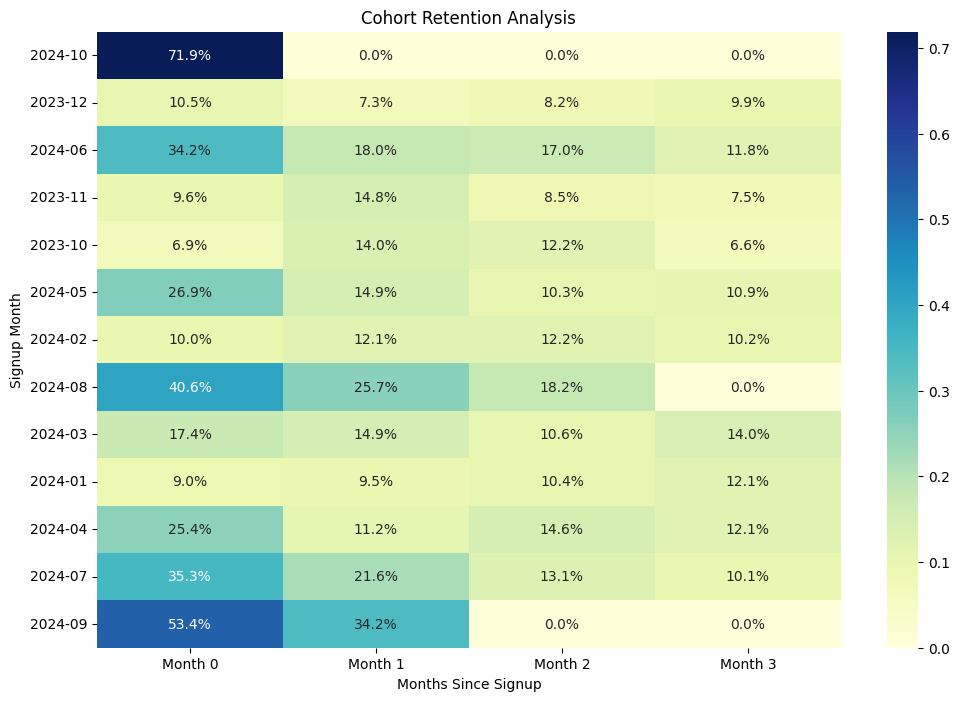

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_df, annot=True, fmt=".1%", cmap="YlGnBu")
plt.title("Cohort Retention Analysis")
plt.xlabel("Months Since Signup")
plt.ylabel("Signup Month")
plt.show()

# f: Reusable Python Class for Preprocessing and Normalizing Data

* This class provides a generalized approach for:

* Handling NULL values.

* Encoding categorical variables.

* Aggregating timestamps into periods (e.g., weekly, monthly, etc.).

* Other preprocessing tasks.

In [25]:
class DataPreprocessor:
    def __init__(self, datetime_columns=None, categorical_columns=None, fillna_value="Unknown"):
        self.datetime_columns = datetime_columns or []
        self.categorical_columns = categorical_columns or []
        self.fillna_value = fillna_value

    def preprocess(self, df):
        df = df.copy()

        # Parse datetime columns
        for col in self.datetime_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors="coerce")

        # Handle NULL values
        df = df.fillna(self.fillna_value)

        # Encode categorical variables
        for col in self.categorical_columns:
            if col in df.columns:
                df[col] = df[col].astype("category").cat.codes

        return df

    def aggregate_to_period(self, df, timestamp_column, period="M"):
        df = df.copy()
        if timestamp_column in df.columns:
            df["period"] = df[timestamp_column].dt.to_period(period)
        return df

# g. Preprocessor for orders data 

In [26]:
# Preprocessor for orders data
orders_preprocessor = DataPreprocessor(
    datetime_columns=["created_at", "updated_at", "deleted_at"],
    categorical_columns=["status"]
)

# Preprocessor for group cart variations
group_cart_preprocessor = DataPreprocessor(
    datetime_columns=["created_at", "updated_at", "deleted_at"],
    categorical_columns=["product_category"]
)
orders_df = orders_preprocessor.preprocess(orders_df)
# Preprocess group cart variations
group_cart_variations_df = group_cart_preprocessor.preprocess(group_cart_variations_df)
# Aggregate orders by month
orders_df = orders_preprocessor.aggregate_to_period(orders_df, timestamp_column="created_at", period="M")

# h. function that acalculate Sales growth

In [27]:
def calculate_sales_growth(orders, group_cart_variations, period="M", top_n=5):
    sales_data = orders.merge(
        group_cart_variations, 
        left_on="groups_carts_id", 
        right_on="group_cart_id", 
        how="inner"
    )
    sales_data["product_category"] = np.random.choice(
        ["Electronics", "Clothing", "Groceries", "Home", "Toys"], 
        size=len(sales_data)
    )
    sales_data["period"] = sales_data["created_at_y"].dt.to_period(period)
    sales_summary = sales_data.groupby(["period", "product_category"]).agg(
        total_sales=("total_amount", "sum")
    ).reset_index()
    popular_categories = sales_summary.groupby("product_category")["total_sales"].sum().nlargest(top_n).index
    sales_summary = sales_summary[sales_summary["product_category"].isin(popular_categories)]

    sales_summary["sales_growth"] = sales_summary.groupby("product_category")[
        "total_sales"
    ].pct_change() * 100  # Percentage growth

    return sales_summary

In [28]:
sales_growth=pd.DataFrame(calculate_sales_growth(orders_df, group_cart_variations_df, period="M", top_n=5))

# Display Percentage growth

In [35]:
# Attempt to convert 'period' column to datetime, handling errors by coercing invalid entries to NaT
sales_growth['period'] = pd.to_datetime(sales_growth['period'])#, errors='coerce', format='%Y-%m')

# Data Visualization

## a. Sales Over Time: Visualize total_sales over the period for different product categories.
# Convert period to datetime for better plotting

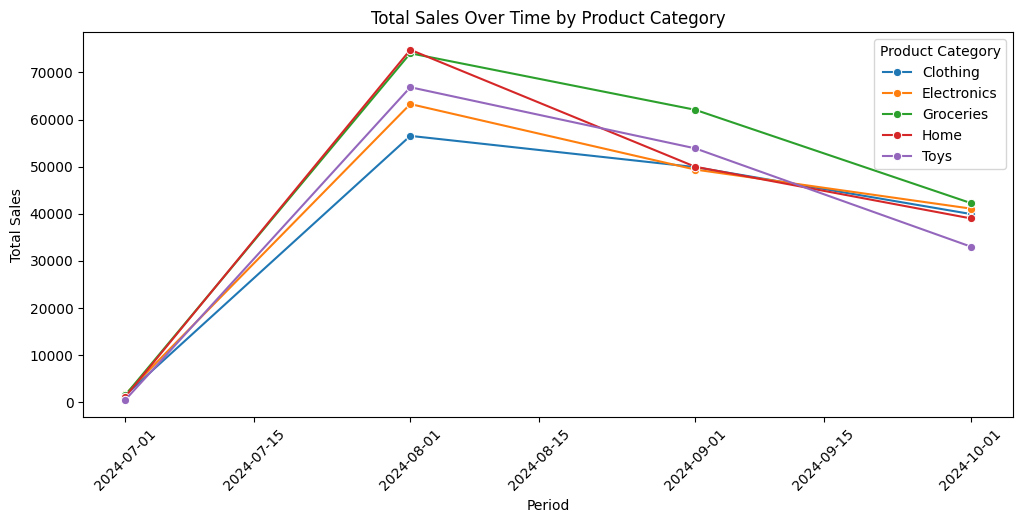

In [36]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=sales_growth, x="period", y='total_sales', hue='product_category', marker='o')
plt.title('Total Sales Over Time by Product Category')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

#### a. We ensure all datetime fields are parsed correctly and handle any inconsistencies in the data.

In [32]:
datetime_cols = {
    "users": ["created_at", "updated_at", "deleted_at"],
    "group_deals": ["created_at", "updated_at", "deleted_at", "effective_from", "effective_to"],
    "orders": ["created_at", "updated_at", "deleted_at"],
    "group_cart_variations": ['created_at', 'quantity','updated_at'],
    "categories":['created_at', 'updated_at','deleted_at'],
    "product_variations":['created_at', 'updated_at', 'deleted_at'],
    "groups":['created_by','created_at','updated_at', 'deleted_at'],
    "groups_carts": ["created_at", "updated_at", "deleted_at"]
}

#### b. Function to parse datetime fields

In [33]:

def parse_datetime(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors="coerce")
    return df

In [34]:
# Parse datetime fields for each dataset
users = parse_datetime(users, datetime_cols["users"])
group_deals = parse_datetime(group_deals, datetime_cols["group_deals"])
orders = parse_datetime(orders, datetime_cols["orders"])
group_cart_variations = parse_datetime(group_cart_variations, datetime_cols["group_cart_variations"])
categories = parse_datetime(categories, datetime_cols["categories"])
product_variations = parse_datetime(product_variations, datetime_cols["product_variations"])
groups = parse_datetime(groups, datetime_cols["groups"])
groups_carts=parse_datetime(groups_carts,datetime_cols["groups_carts"])

NameError: name 'users' is not defined

## b. Sales Growth Analysis: Plot sales_growth to analyze trends.

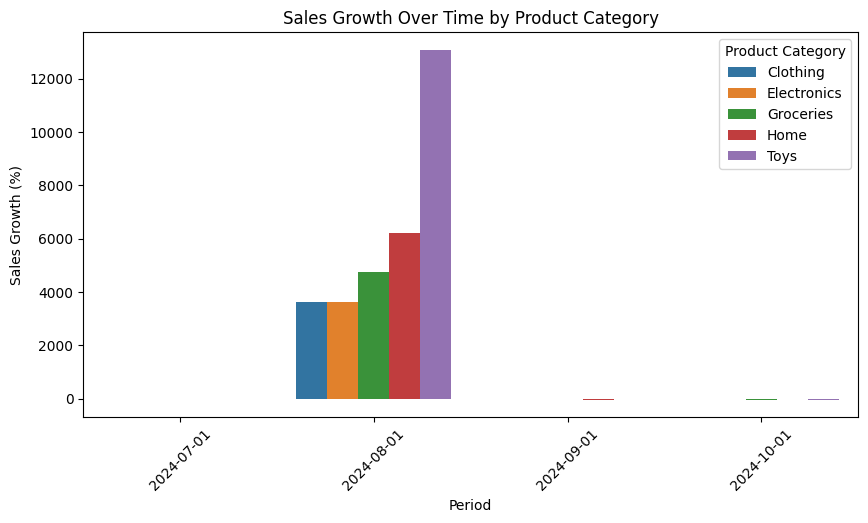

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(data=sales_growth, x='period', y='sales_growth', hue='product_category')
plt.title('Sales Growth Over Time by Product Category')
plt.xlabel('Period')
plt.ylabel('Sales Growth (%)')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# Further Analysis

###  A. Seasonality Analysis

* Identify Seasonality: Examine how sales fluctuate across different months or seasons.

#  Visualize Monthly Trends:

* Aggregate total sales by month and visualize to identify seasonal patterns.


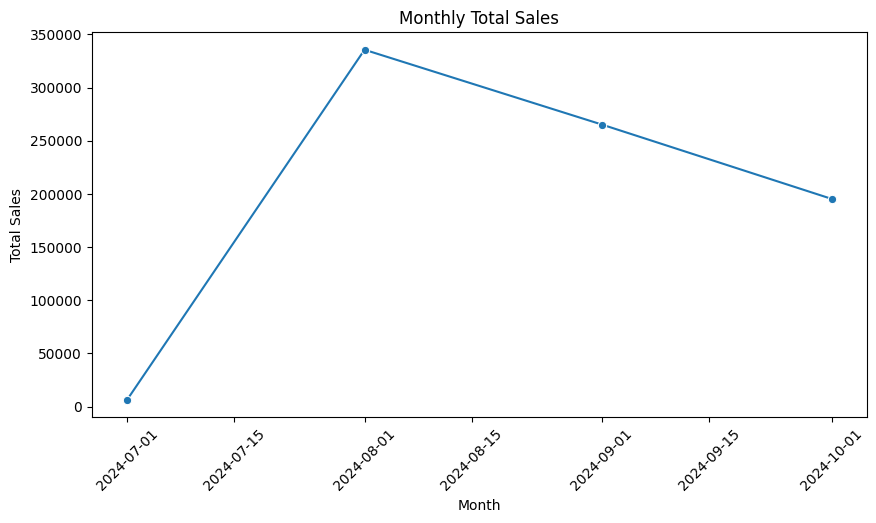

In [38]:
monthly_sales = sales_growth.groupby(sales_growth['period'].dt.to_period('M')).agg({'total_sales': 'sum'}).reset_index()
monthly_sales['period'] = monthly_sales['period'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='period', y='total_sales', marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Analyze Seasonal Effects: 

### Use statistical methods (such as Seasonal Decomposition of Time Series) to quantify seasonality.

In [39]:
monthly_sales

,period,total_sales
0,2024-07-01,6431.00
1,2024-08-01,335578.00
2,2024-09-01,265224.00
3,2024-10-01,195319.75


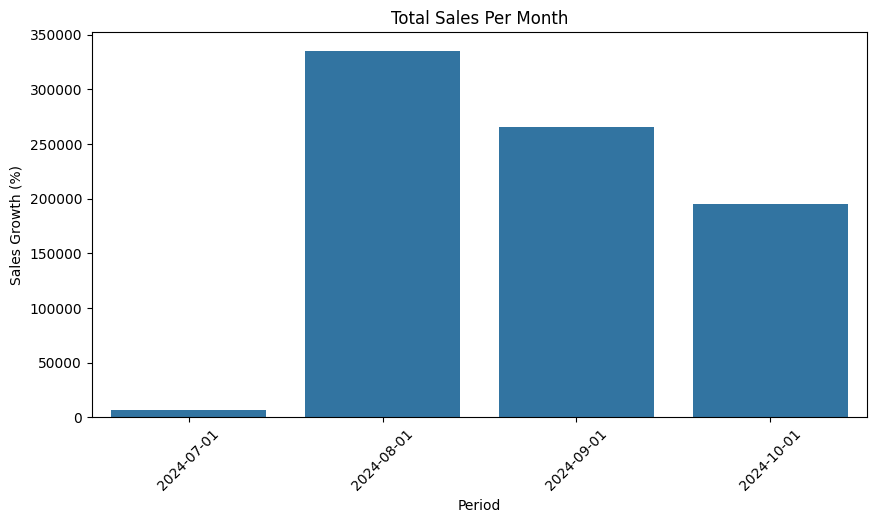

In [40]:
plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_sales, x='period', y='total_sales')
plt.title('Total Sales Per Month')
plt.xlabel('Period')
plt.ylabel('Sales Growth (%)')
plt.xticks(rotation=45)
plt.show()

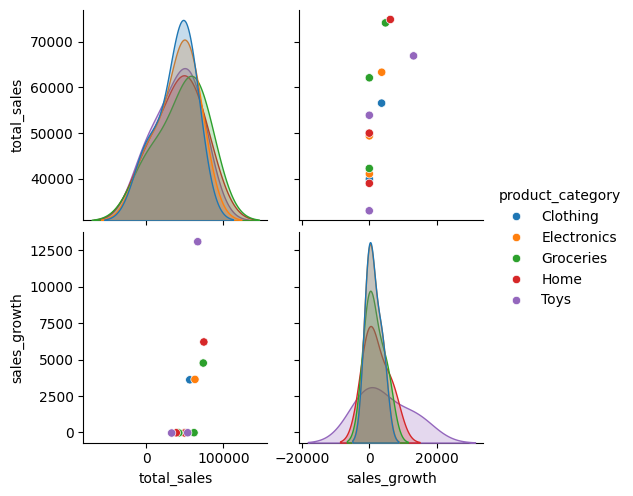

In [41]:
sns.pairplot(sales_growth, hue='product_category')
plt.show()

In [42]:
# Feature Engineering
sales_growth['week_of_year'] = sales_growth['period'].dt.isocalendar().week
sales_growth['month'] = sales_growth['period'].dt.month
sales_growth['year'] = sales_growth['period'].dt.year
sales_growth['lagged_sales'] = sales_growth['total_sales'].shift(1)
sales_growth['cumulative_sales'] = sales_growth['total_sales'].cumsum()
data=sales_growth.dropna()  # Drop NaN values from lagged sales

In [43]:
data

,period,product_category,total_sales,sales_growth,week_of_year,month,year,lagged_sales,cumulative_sales
5,2024-08-01,Clothing,56535.00,3612.081418,31,8,2024,507.00,62966.00
6,2024-08-01,Electronics,63289.00,3640.484634,31,8,2024,56535.00,126255.00
7,2024-08-01,Groceries,74073.00,4763.624425,31,8,2024,63289.00,200328.00
8,2024-08-01,Home,74819.00,6208.516020,31,8,2024,74073.00,275147.00
9,2024-08-01,Toys,66862.00,13087.771203,31,8,2024,74819.00,342009.00
10,2024-09-01,Clothing,49901.00,-11.734324,35,9,2024,66862.00,391910.00
11,2024-09-01,Electronics,49384.00,-21.970643,35,9,2024,49901.00,441294.00
12,2024-09-01,Groceries,62072.00,-16.201585,35,9,2024,49384.00,503366.00
13,2024-09-01,Home,49981.00,-33.197450,35,9,2024,62072.00,553347.00
14,2024-09-01,Toys,53886.00,-19.407137,35,9,2024,49981.00,607233.00


# Predictive Modeling

### Define the Target Variable: Identify which products are likely to sell out within the next week.

* Split the Data: Create training and testing datasets.

* Select Features: Choose relevant features for the model.

In [44]:
data.head()

,period,product_category,total_sales,sales_growth,week_of_year,month,year,lagged_sales,cumulative_sales
5,2024-08-01,Clothing,56535.0,3612.081418,31,8,2024,507.0,62966.0
6,2024-08-01,Electronics,63289.0,3640.484634,31,8,2024,56535.0,126255.0
7,2024-08-01,Groceries,74073.0,4763.624425,31,8,2024,63289.0,200328.0
8,2024-08-01,Home,74819.0,6208.516020,31,8,2024,74073.0,275147.0
9,2024-08-01,Toys,66862.0,13087.771203,31,8,2024,74819.0,342009.0


In [45]:
data

,period,product_category,total_sales,sales_growth,week_of_year,month,year,lagged_sales,cumulative_sales
5,2024-08-01,Clothing,56535.00,3612.081418,31,8,2024,507.00,62966.00
6,2024-08-01,Electronics,63289.00,3640.484634,31,8,2024,56535.00,126255.00
7,2024-08-01,Groceries,74073.00,4763.624425,31,8,2024,63289.00,200328.00
8,2024-08-01,Home,74819.00,6208.516020,31,8,2024,74073.00,275147.00
9,2024-08-01,Toys,66862.00,13087.771203,31,8,2024,74819.00,342009.00
10,2024-09-01,Clothing,49901.00,-11.734324,35,9,2024,66862.00,391910.00
11,2024-09-01,Electronics,49384.00,-21.970643,35,9,2024,49901.00,441294.00
12,2024-09-01,Groceries,62072.00,-16.201585,35,9,2024,49384.00,503366.00
13,2024-09-01,Home,49981.00,-33.197450,35,9,2024,62072.00,553347.00
14,2024-09-01,Toys,53886.00,-19.407137,35,9,2024,49981.00,607233.00


# Group the data by product category and period (or another relevant dimension)

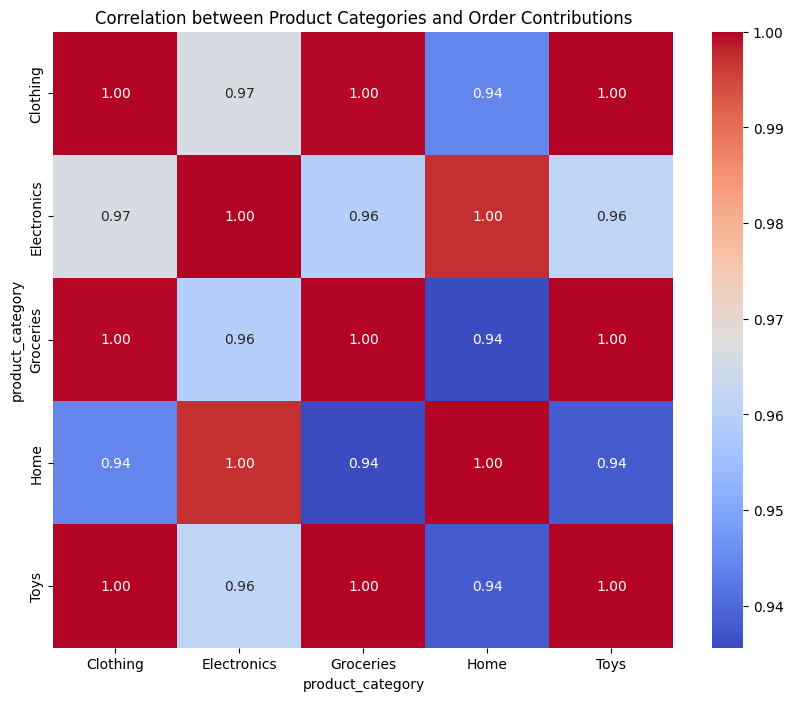

In [46]:
grouped_data = data.groupby(['period', 'product_category'])['total_sales'].sum()
# Convert the groupby object into a DataFrame with a MultiIndex
heatmap_data = grouped_data.unstack(fill_value=0)
# Calculate correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Product Categories and Order Contributions")
plt.show()


In [47]:
data.head()

,period,product_category,total_sales,sales_growth,week_of_year,month,year,lagged_sales,cumulative_sales
5,2024-08-01,Clothing,56535.0,3612.081418,31,8,2024,507.0,62966.0
6,2024-08-01,Electronics,63289.0,3640.484634,31,8,2024,56535.0,126255.0
7,2024-08-01,Groceries,74073.0,4763.624425,31,8,2024,63289.0,200328.0
8,2024-08-01,Home,74819.0,6208.516020,31,8,2024,74073.0,275147.0
9,2024-08-01,Toys,66862.0,13087.771203,31,8,2024,74819.0,342009.0


In [48]:
# Example workflow
time_series = data['total_sales']


<Figure size 1000x500 with 0 Axes>

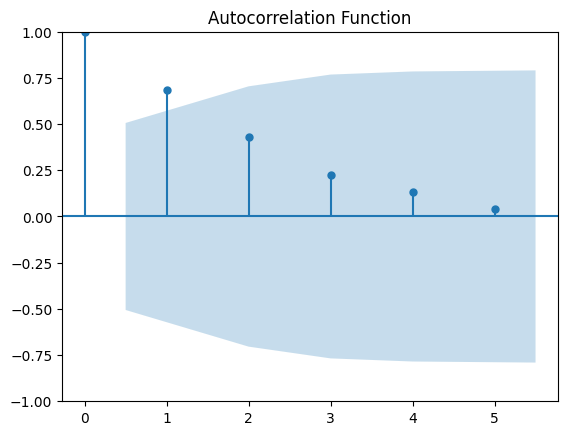

<Figure size 1000x500 with 0 Axes>

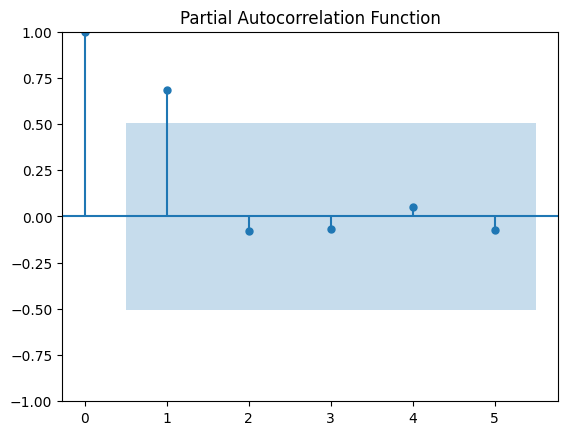

ADF Statistic: -0.930573541717565
p-value: 0.777737476359972
The series is not stationary. Differencing might be needed.


In [49]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# ACF Plot
plt.figure(figsize=(10, 5))
plot_acf(time_series, lags=5, title="Autocorrelation Function")
plt.show()

# PACF Plot
plt.figure(figsize=(10, 5))
plot_pacf(time_series, lags=5, title="Partial Autocorrelation Function")
plt.show()

# ADF Test
adf_result = adfuller(time_series)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing might be needed.")


* Since the series is not stationary, you would typically apply differencing before fitting it into an ARIMA model.

# Using for ARIMA Models:

### For ARIMA models, a stationary time series is required. If the time series is not stationary (as indicated by your ADF test), differencing is a common method to make the series stationary. Here's how you can proceed:

### First Differencing: Subtract the previous observation from the current observation to create a new time series.

In [50]:
data['diff'] = data['total_sales'].diff()

### Check Stationarity Again: After differencing, perform the ADF test again to check if the series has become stationary.

In [51]:
adf_result_diff = adfuller(data['diff'].dropna())
print("ADF Statistic (differenced):", adf_result_diff[0])
print("p-value (differenced):", adf_result_diff[1])

ADF Statistic (differenced): -6.041770938060936
p-value (differenced): 1.3406918735145948e-07


# Interpretation:
### ADF Statistic: The ADF statistic is quite negative, which is a good sign that the null hypothesis of a unit root (non-stationarity) can be rejected.

* p-value: The p-value is very small (much lower than 0.05), which means that we reject the null hypothesis and conclude that the series is stationary after differencing.

### Then we find p and q by ploting ACF and Pacf 

In [52]:
data.head()

,period,product_category,total_sales,sales_growth,week_of_year,month,year,lagged_sales,cumulative_sales,diff
5,2024-08-01,Clothing,56535.0,3612.081418,31,8,2024,507.0,62966.0,NaN
6,2024-08-01,Electronics,63289.0,3640.484634,31,8,2024,56535.0,126255.0,6754.0
7,2024-08-01,Groceries,74073.0,4763.624425,31,8,2024,63289.0,200328.0,10784.0
8,2024-08-01,Home,74819.0,6208.516020,31,8,2024,74073.0,275147.0,746.0
9,2024-08-01,Toys,66862.0,13087.771203,31,8,2024,74819.0,342009.0,-7957.0


<Figure size 1000x500 with 0 Axes>

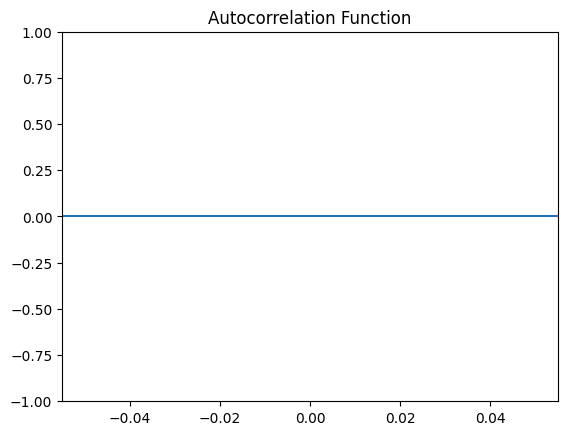

<Figure size 1000x500 with 0 Axes>

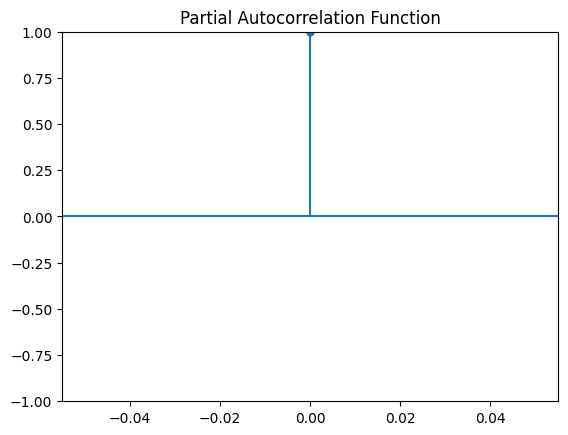

ADF Statistic: -6.041770938060936
p-value: 1.3406918735145948e-07
The series is stationary.


In [53]:
# ACF Plot
plt.figure(figsize=(10, 5))
plot_acf(data["diff"], lags=5, title="Autocorrelation Function")
plt.show()

# PACF Plot
plt.figure(figsize=(10, 5))
plot_pacf(data["diff"], lags=5, title="Partial Autocorrelation Function")
plt.show()

# ADF Test
adf_result = adfuller(data["diff"][1:])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing might be needed.")

In [54]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model (p, d, q)
model = ARIMA(data['total_sales'], order=(0, 1, 0))  # Differenced once (d=1)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            total_sales   No. Observations:                   15
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -147.010
Date:                Sun, 19 Jan 2025   AIC                            296.019
Time:                        18:22:00   BIC                            296.658
Sample:                             0   HQIC                           295.960
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.199e+07   3.18e+07      2.263      0.024    9.65e+06    1.34e+08
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.73   Pr

/home/abe/miniconda3/envs/py39/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/abe/miniconda3/envs/py39/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/abe/miniconda3/envs/py39/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
